# ENVIRONMENT

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# pca is a python package to perform Principal Component Analysis and to examine the variance in-depth.
from pca import pca as pca_pkg

# suppress scientific notation in Pandas
pd.options.display.float_format = "{:,.2f}".format
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("precision", 3)
pd.set_option("display.max_colwidth", None)

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.dpi"] = 150

sns.set()
sns.set_context("notebook", rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid", {'axes.grid' : False})

import warnings

warnings.filterwarnings("ignore")

RANDOM_STATE = 1

original_df = pd.read_csv("./src/churn/churn_clean.csv")


## PCA Examples

### Scenario 1

One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.

 

You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to use principal component analysis (PCA) to analyze customer data to identify the principal variables of your customers, ultimately allowing better business and strategic decision-making.

 

### Scenario 2

One of the most critical factors in patient relationship management that directly affects a hospital’s long-term cost-effectiveness is understanding its patients and the conditions leading to hospital admissions. When a hospital can better understand its patients’ characteristics, it is better able to target treatment to patients, resulting in more effective cost of care for the hospital in the long term.

 

You are an analyst for a hospital that wants to better understand the characteristics of its patients. You have been asked to use PCA to analyze patient data to identify the principal variables of your patients, ultimately allowing better business and strategic decision-making for the hospital.

# Part I: Research Question

## A.  Describe the purpose of this data mining report by doing the following:

### 1.  Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).
*The submission proposes 1 question answered using PCA that is relevant to a real-world organizational situation.*

> Gibson Telecom recently hired Lisa Murphy, a new VP of Growth for the Northeastern Region of the United States. Lisa has spent most of her career in the consumer discretionary sector and now wants to familiarize herself with Gibson Telecom's customer base and the customer personas. Before starting her first initiative, she needs Gibson's data analyst team to report on the key attributes and characteristics that define Gibson's customers. 


### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
*The submission defines 1 reasonable goal for data analysis that is within the scope of the scenario and is represented in the available data.*

> The goal of this PCA analysis is to reduce the data features in Gibson Telecom's customer dataset into a feature subset of principal components. The purpose of this is to capture the maximal amount of variance and Northeastern customer information. Furthermore, analysts want to select enough principal components to explain at least 75% of the Northeast customer dataset variance. These components will provide the best lens to evaluate and detect key differences between data observations (Jaadi, 2021). Accomplishing this goal will prepare Lisa with enough information to start her growth initiative.


# Part II: Method Justification

## B.  Explain the reasons for using PCA by doing the following:

### 1.  Explain how PCA analyzes the selected data set. Include expected outcomes.

At a high-level PCA analyzes the Northeast Customer data set by assuming that more variability better explains a dependent variable's behavior. Consequently, high variability data features typically indicate signal, whereas low variability data features usually indicate noise.

PCA is an unsupervised learning method that detects patterns in high-dimensional data with the goal of representing data using fewer features (Smith, 2002). After performing PCA, a dataset becomes less complex, requires less disk space, requires less computation time, has a lower chance of model overfitting, and no longer contains linear correlations between features.

PCA involves multiple data transformations and representations. For example, we'll create a Covariance Matrix of our data to understand how each variable is associated with one another. We'll also explore Eigenvectors to understand the data's directionality and dispersion. Then we'll view the relative importance of these different directions by comparing Eigenvalues. Lastly, we'll select eigenvectors that are important (Brems, 2022).

The underlying PCA data transformations can be summarized in several steps. First, we center each dataset feature around the origin 0 using the feature's average value. Second, PCA finds the best fitting line through the origin and data points. This line is the first principal component (PC) and represents a line in the direction with the maximum variance. We then repeat this step for the remaining PCs by finding the best fitting line perpendicular to existing principal components. Third, PCA computes the principal components and their respective loadings. These loadings are the linear combination of the initial data features where coefficients represent the feature's proportion within the PC. The coefficients range from -1 to 1. A larger absolute value indicates a variable with a strong influence on the component. Additionally, the coefficient's sign (+/-) indicates a positive or negative correlation. Lastly, PCA rotates the projected dataset so that the x-axis contains PC1 — the direction of the largest variance. From here we can use the explained variance from each PC to determine how many PCs to retain (Taskesen, 2022).

### 2.  Summarize one assumption of PCA.
One assumption of PCA is that it is highly sensitive to data scaling and features measured on different scales — a large range in data variances can negatively impact the analysis and lead to biased results. More specifically, variables with a larger variance will dominate those with a smaller variance (Jaadi, 2021). To overcome this and ensure each feature contributes equally to the analysis, we'll use sklearn.preprocessing.StandardScaler to scale the data, yielding variables with a mean of 0 and a standard deviation of 1.


# Part III: Data Preparation

## C.  Perform data preparation for the chosen dataset by doing the following:




### 1.  Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.

In [69]:
prep_df = original_df.copy()

# Northeast Region states (as defined by the US Census Bureau)
NE_Region_States = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
prep_df = prep_df[prep_df.State.isin(['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'])]

print(f"{prep_df.shape[0]} customer records in the NE Region")

1841 customer records in the NE Region


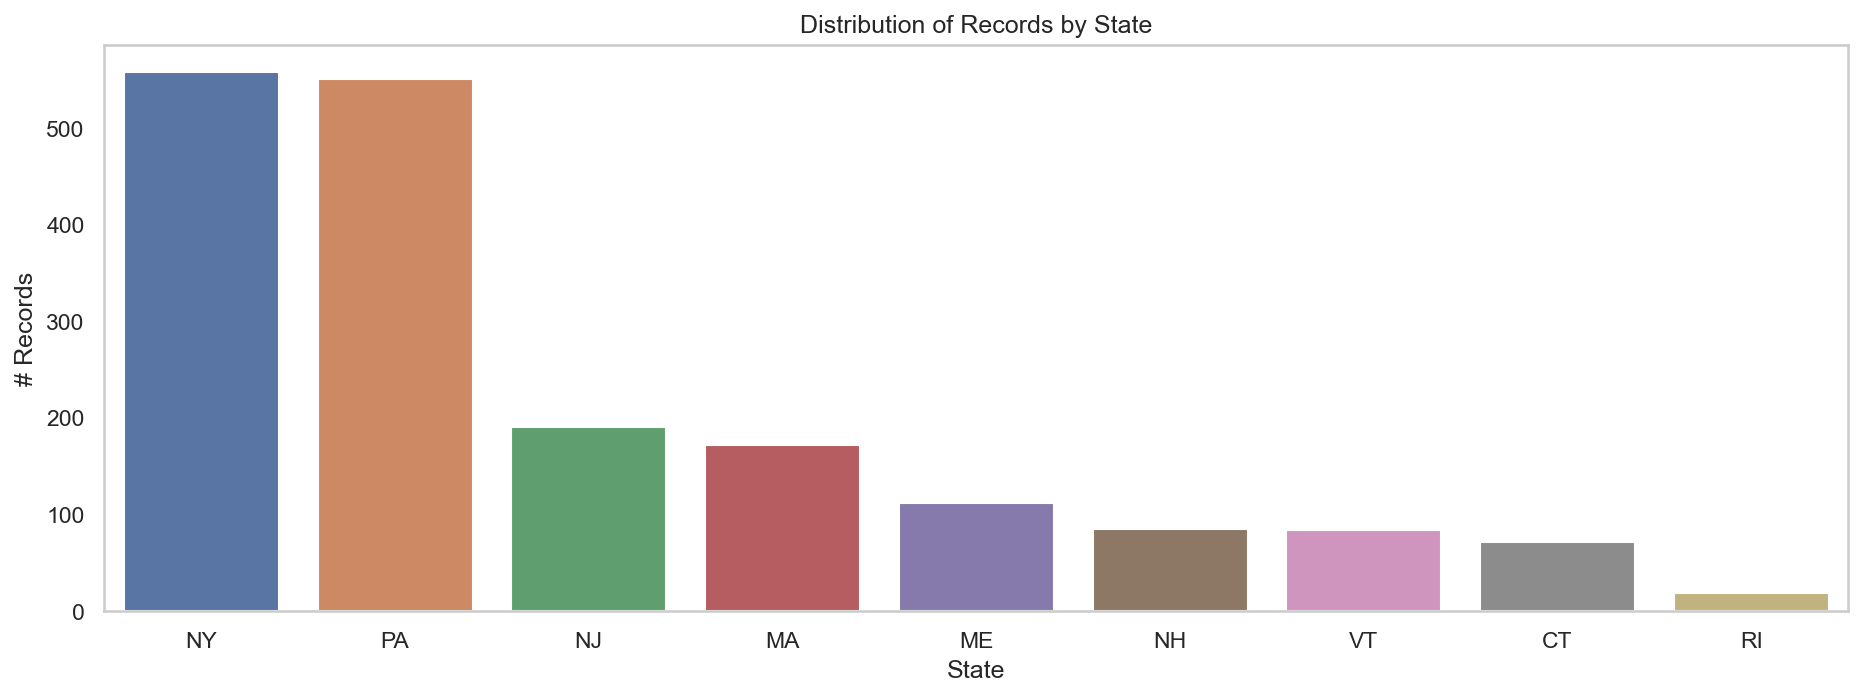

In [74]:
state_dist_df = pd.DataFrame({"# Records": prep_df.groupby("State").count().CaseOrder}).reset_index().sort_values(by="# Records", ascending=False)

fig = plt.subplots(figsize=(15, 5))
_ = sns.barplot(x="State", y="# Records", data=state_dist_df).set_title("Distribution of Records by State")

In [75]:
prep_df = prep_df.select_dtypes(['float64', 'int64']).copy()
prep_df = prep_df.drop(['CaseOrder', 'Zip', 'Lat', 'Lng'], axis=1, errors="ignore")

prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 10 to 9995
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            1841 non-null   int64  
 1   Children              1841 non-null   int64  
 2   Age                   1841 non-null   int64  
 3   Income                1841 non-null   float64
 4   Outage_sec_perweek    1841 non-null   float64
 5   Email                 1841 non-null   int64  
 6   Contacts              1841 non-null   int64  
 7   Yearly_equip_failure  1841 non-null   int64  
 8   Tenure                1841 non-null   float64
 9   MonthlyCharge         1841 non-null   float64
 10  Bandwidth_GB_Year     1841 non-null   float64
 11  Item1                 1841 non-null   int64  
 12  Item2                 1841 non-null   int64  
 13  Item3                 1841 non-null   int64  
 14  Item4                 1841 non-null   int64  
 15  Item5               

In [91]:
f"The continuous dataset variables are {', '.join(sorted([*prep_df.columns]))}."

'The continuous dataset variables are Age, Bandwidth_GB_Year, Children, Contacts, Email, Income, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8, MonthlyCharge, Outage_sec_perweek, Population, Tenure, Yearly_equip_failure.'

### 2.  Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.
 

In [5]:
prep_df_standard = pd.DataFrame(
    Pipeline(
        steps=[
            ("imp", SimpleImputer(missing_values=np.nan, strategy="median")),
            ("scaler", StandardScaler())
        ]
    ).fit_transform(prep_df),
    columns=prep_df.columns,
)

prep_df_standard.to_csv("./churn_data_prepared.csv", index=False)

In [6]:
prep_df_standard

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,-0.64,2.22,-1.49,-0.61,-0.23,-1.00,-0.99,2.63,-0.57,0.04,-0.30,0.43,0.47,0.45,3.39,-0.44,-0.47,-0.53,0.50
1,-0.69,1.31,-1.20,2.66,-1.37,0.67,-0.02,-0.62,-0.66,0.27,-0.66,1.39,2.43,1.39,-1.48,0.53,1.44,0.47,0.50
2,-0.51,-0.07,0.70,1.41,-0.97,-1.00,-0.99,-0.62,-0.98,-0.55,-1.12,0.43,0.47,-0.50,1.44,-0.44,0.49,0.47,-0.50
3,-0.55,0.39,-1.64,-1.04,1.13,0.34,0.95,-0.62,-1.25,0.62,-0.97,-0.53,0.47,-0.50,-0.51,-1.42,0.49,0.47,-1.51
4,0.20,3.14,-0.42,0.12,-1.13,0.67,-0.99,-0.62,-0.88,1.32,-0.73,-0.53,-1.48,-2.39,1.44,-0.44,-0.47,-0.53,-1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,-0.64,1.31,0.55,-0.54,-0.87,2.00,-0.99,-0.62,0.95,-1.07,0.86,0.43,0.47,-0.50,-0.51,-0.44,-0.47,-1.52,0.50
1837,-0.58,-0.99,-0.08,-0.32,0.03,-0.33,1.92,-0.62,0.80,-0.25,0.72,-0.53,-0.51,-1.45,-1.48,1.51,0.49,0.47,-1.51
1838,-0.43,-0.99,-0.57,-1.05,-0.76,1.00,1.92,-0.62,0.97,-0.25,0.87,-0.53,-0.51,-0.50,0.47,-0.44,0.49,-0.53,-0.50
1839,-0.67,-0.53,-0.37,0.58,-1.36,0.67,-0.02,-0.62,0.59,-0.72,0.72,0.43,-0.51,0.45,0.47,-0.44,-0.47,0.47,0.50


#### Statistical Comparisons

In [7]:
x = {
        "Variance (Before Standardization)": prep_df.var(), 
        "Median (Before Standardization)": prep_df.median(),        
        "Variance (After Standardization)": prep_df_standard.var(),   
        "Median (After Standardization)": prep_df_standard.median()       
    }

pd.DataFrame(x)

,Variance (Before Standardization),Median (Before Standardization),Variance (After Standardization),Median (After Standardization)
Population,"160,350,661.44","3,231.00",1.00,-0.43
Children,4.74,2.00,1.00,-0.07
Age,423.86,54.00,1.00,0.02
Income,"800,931,530.11","33,004.01",1.00,-0.24
Outage_sec_perweek,9.15,10.09,1.00,0.02
Email,9.01,12.00,1.00,0.00
Contacts,1.06,1.00,1.00,-0.02
Yearly_equip_failure,0.38,0.00,1.00,-0.62
Tenure,695.76,25.89,1.00,-0.32
MonthlyCharge,"1,853.00",169.94,1.00,-0.08


#### Boxplot Comparisons

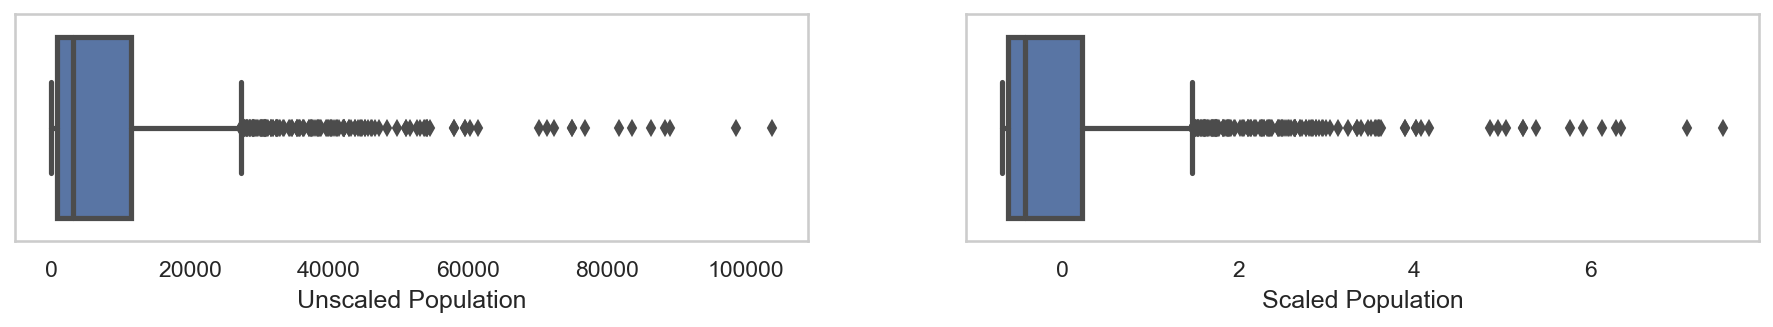

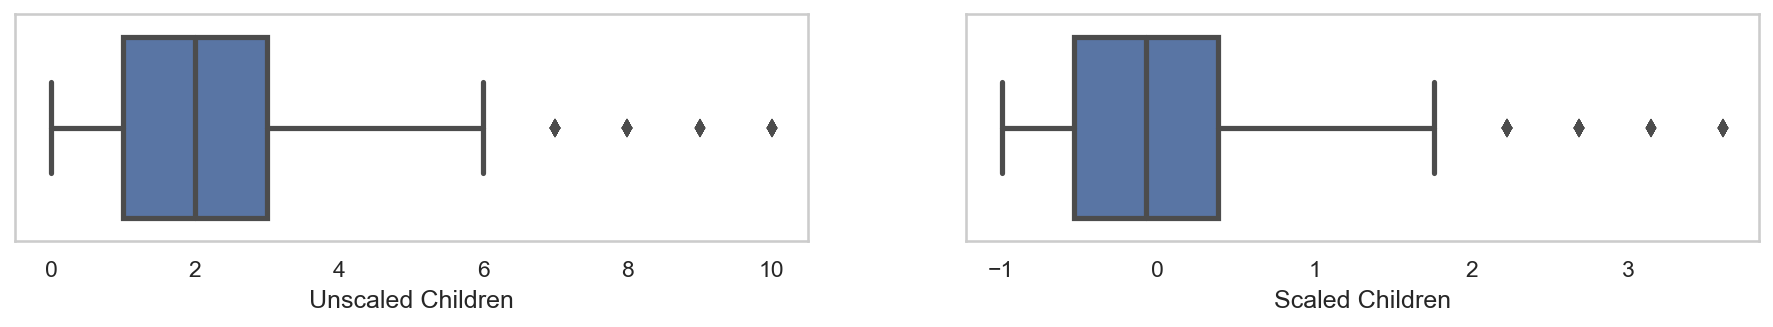

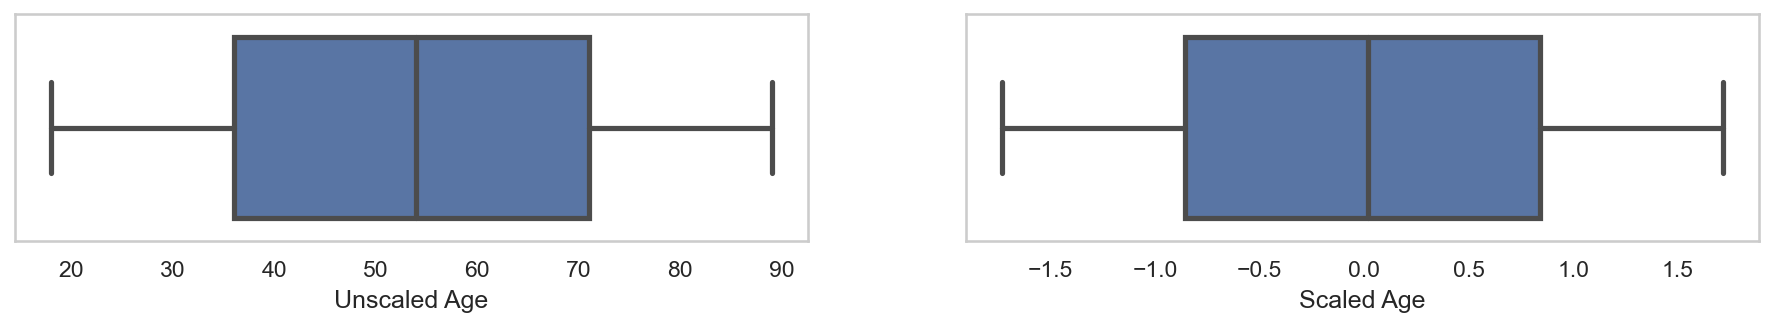

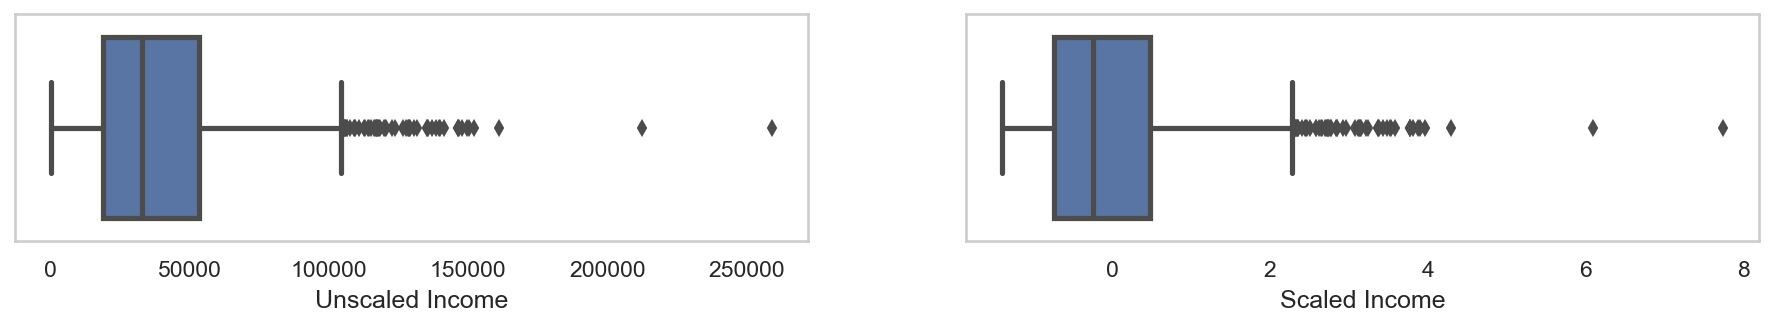

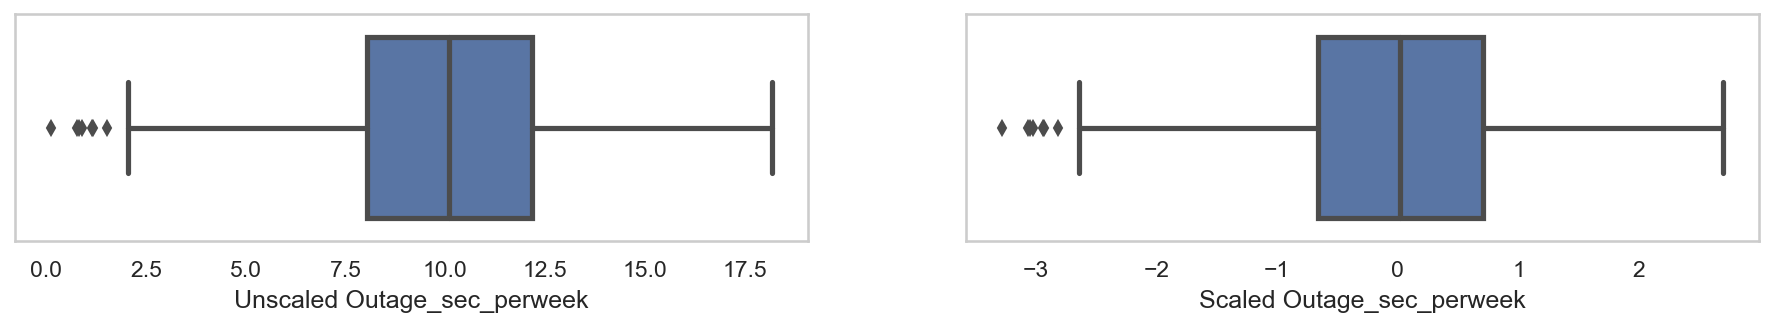

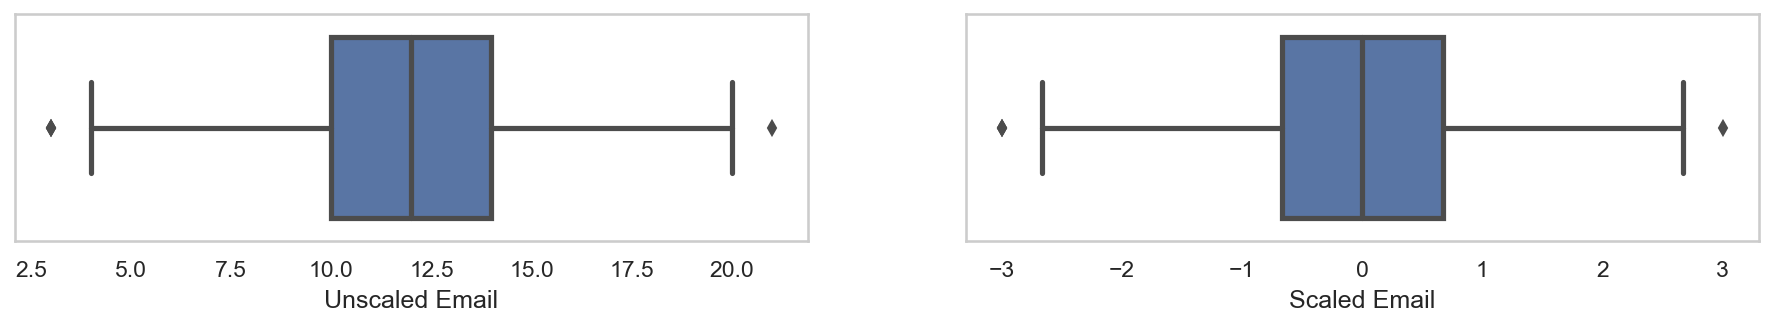

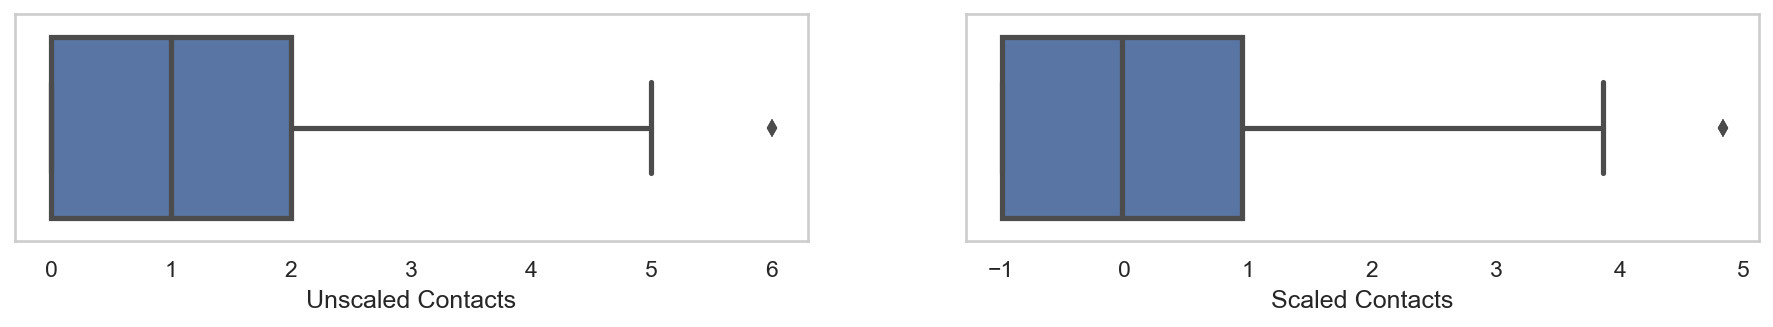

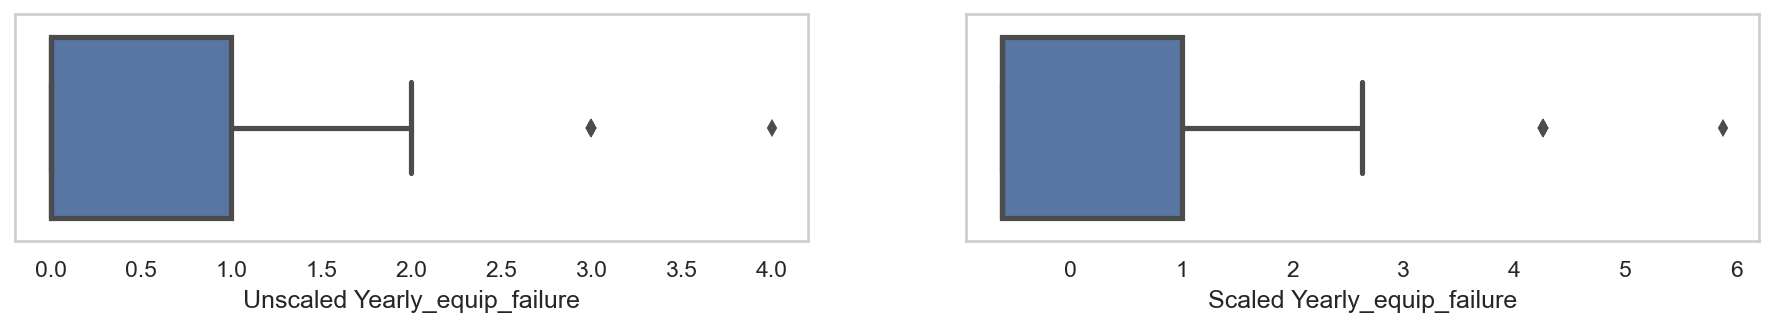

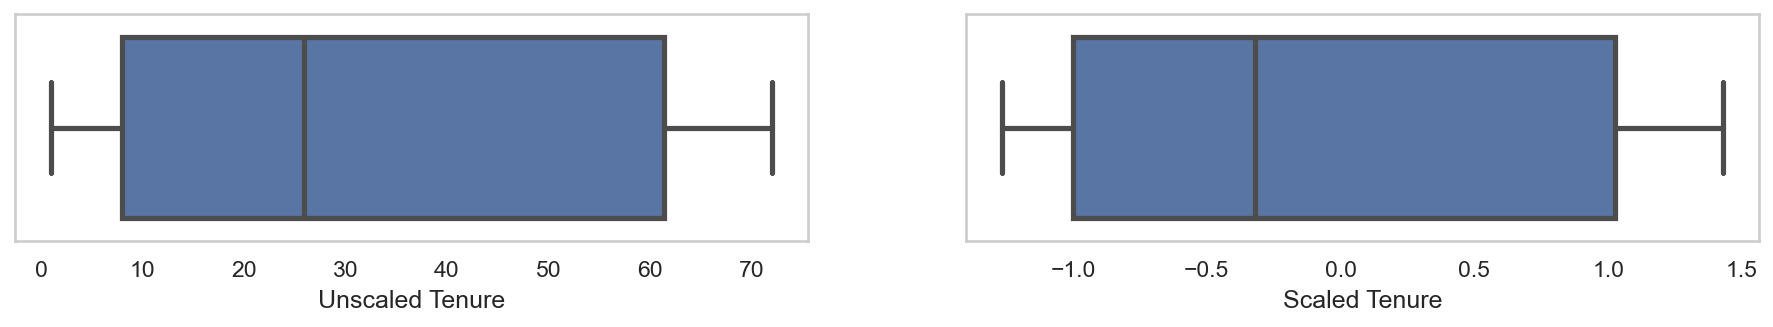

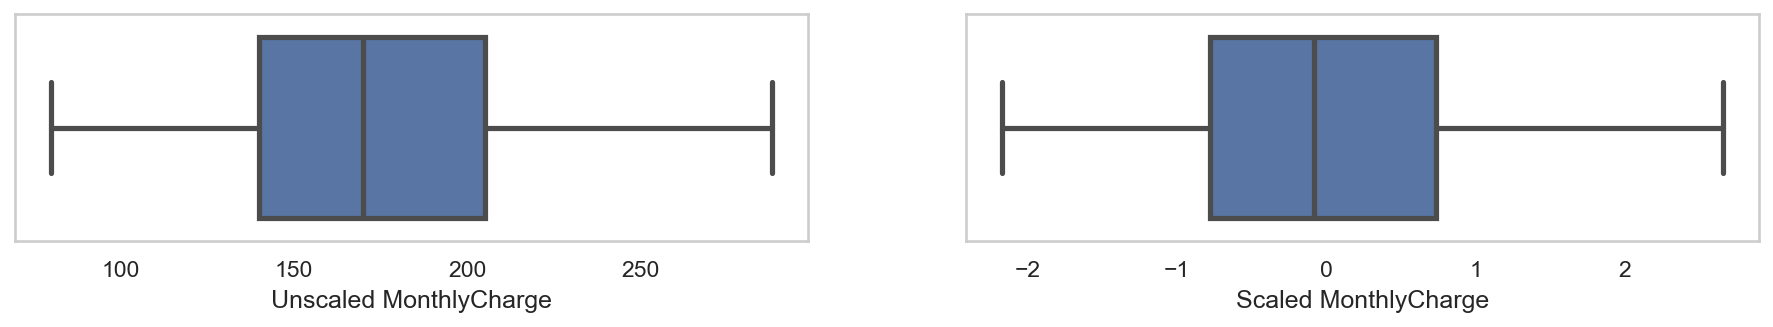

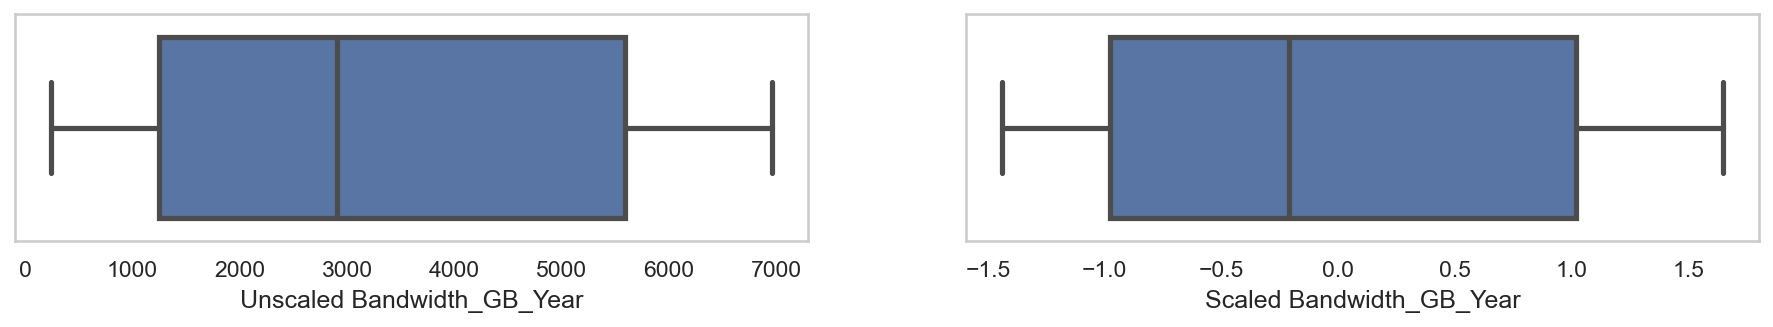

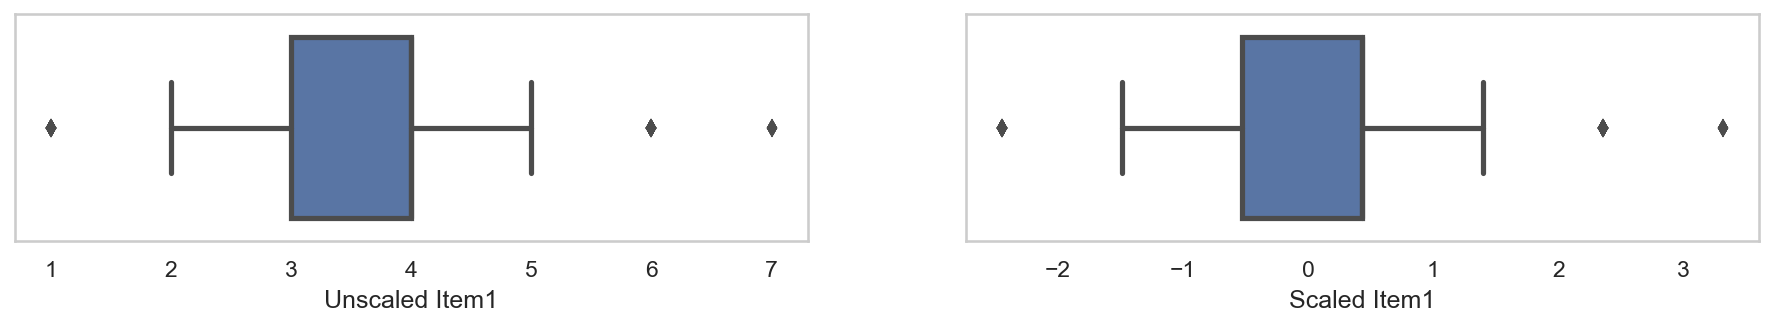

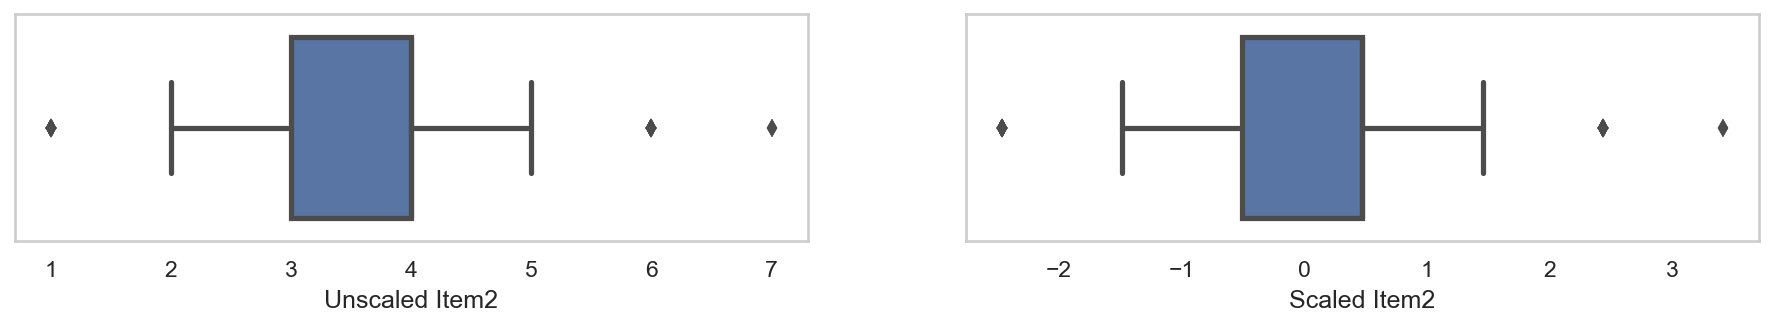

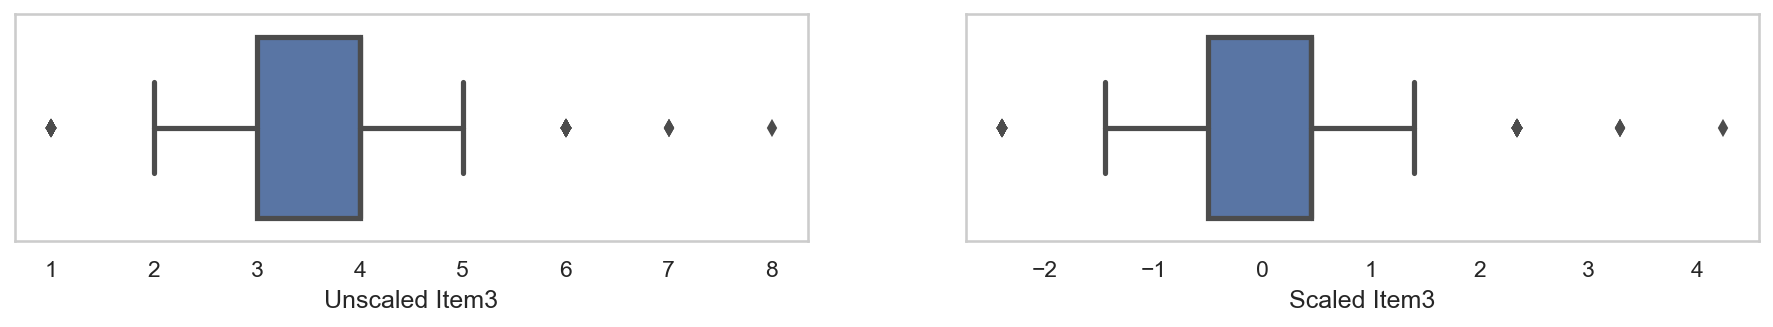

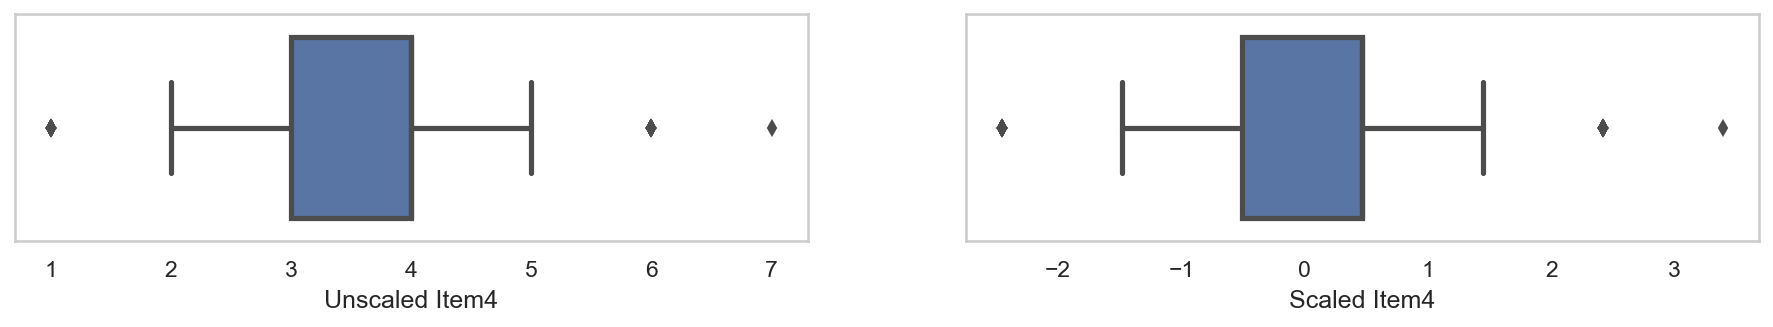

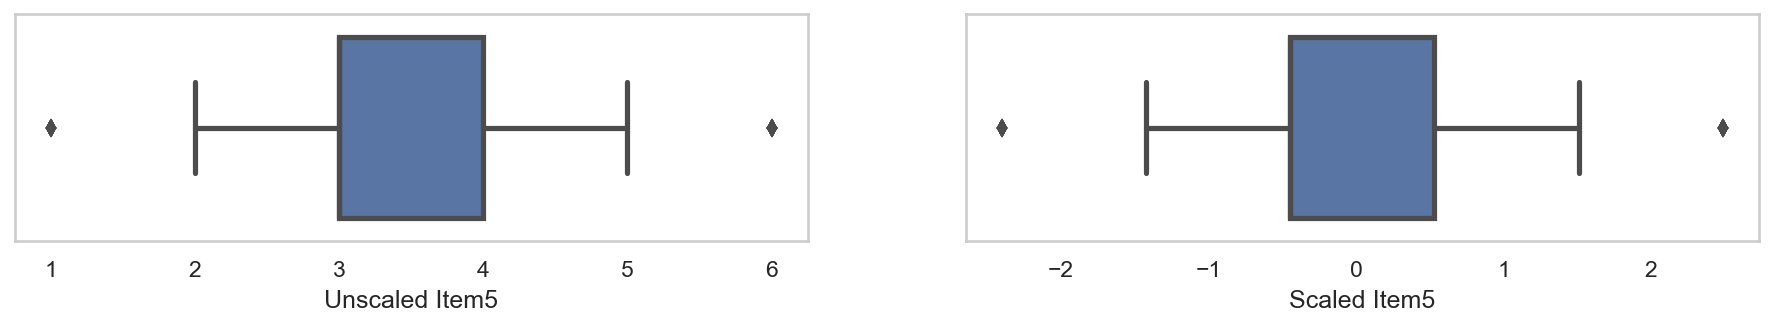

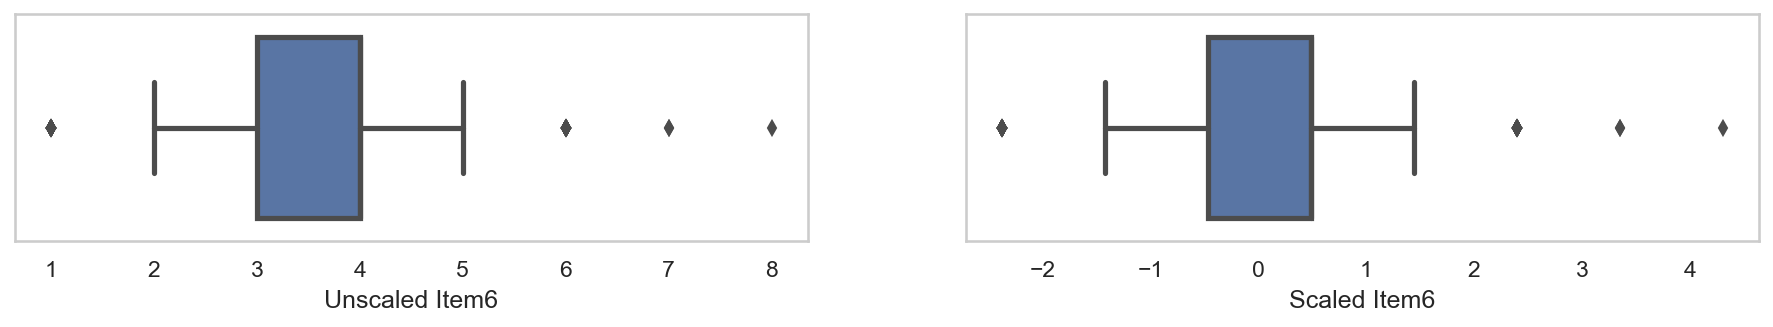

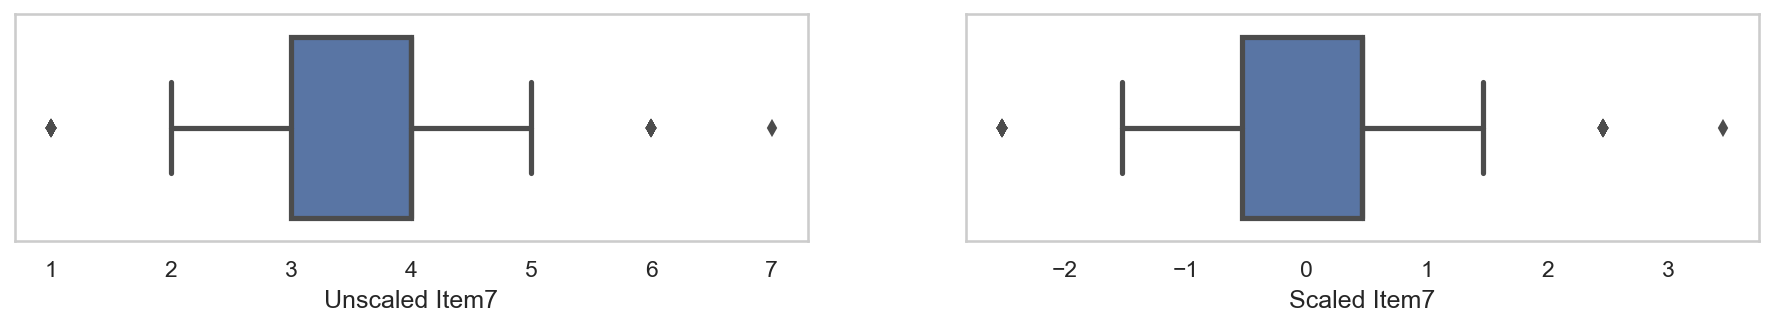

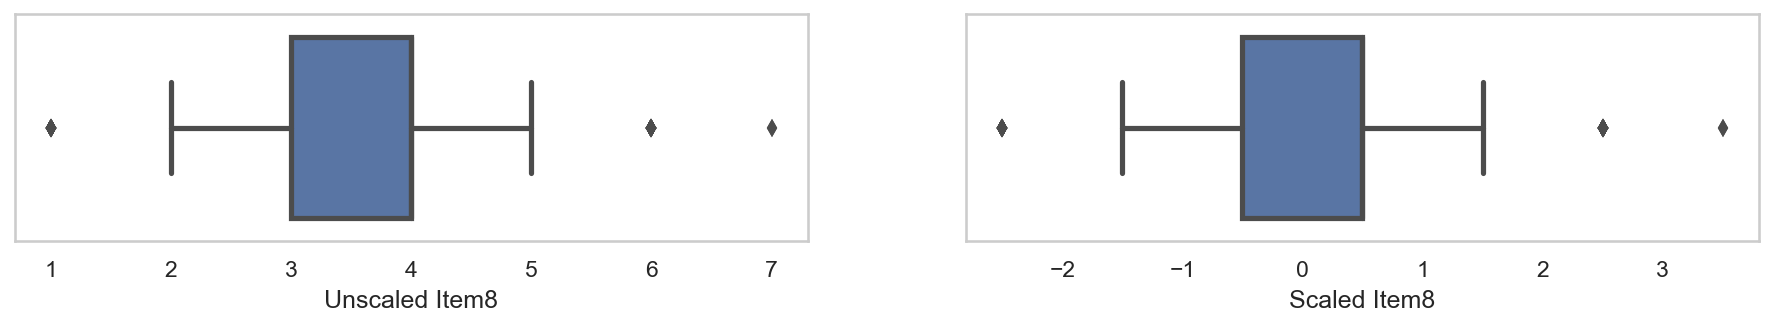

In [8]:
for col, (_, data) in zip(prep_df.columns, prep_df_standard.items()):
    fig, axs = plt.subplots(ncols=2, figsize=(15, 2))
    sns.boxplot(prep_df[col], ax=axs[0]).set(xlabel=f"Unscaled {col}")
    sns.boxplot(data, ax=axs[1]).set(xlabel=f"Scaled {col}")
    plt.show()

#### Correlation Heatmap

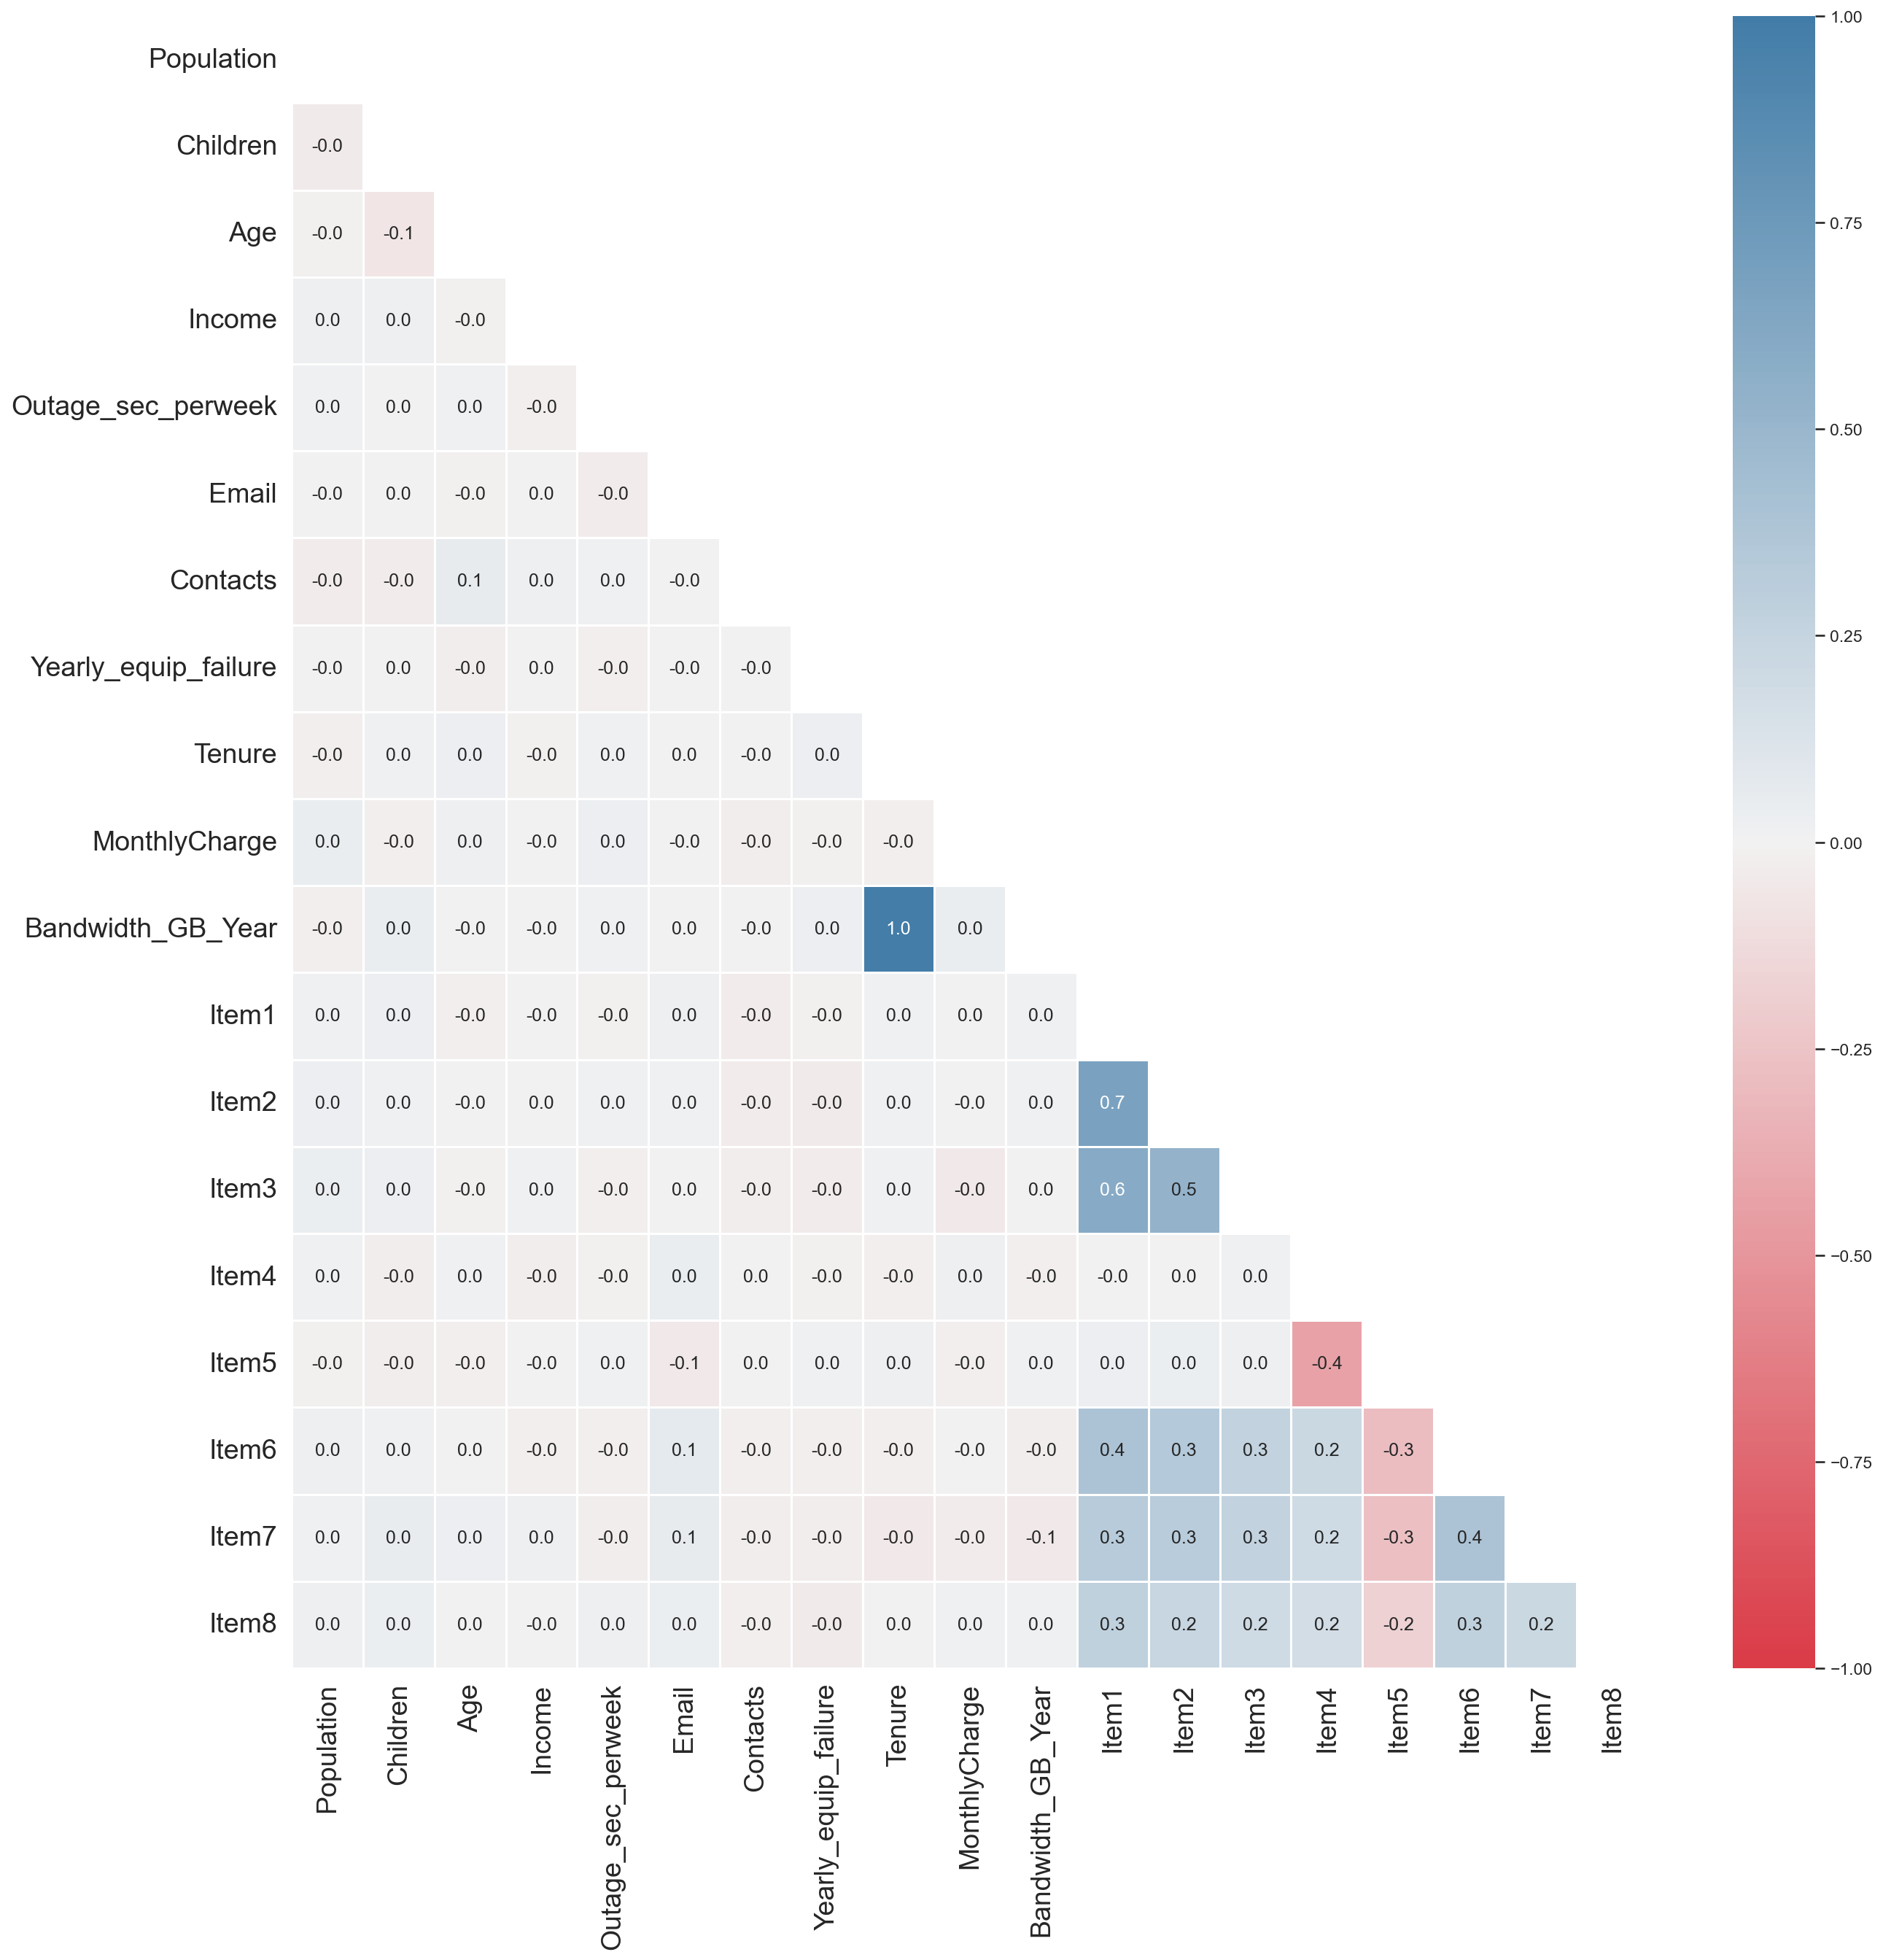

In [12]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 20))
corr_df = prep_df_standard.corr()

# mask part of the matrix
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(
    corr_df,
    center=0,
    cmap=cmap,
    annot=True,
    fmt=".1f",
    vmin=-1.0,
    vmax=1.0,
    mask=mask,
    linewidths=0.5,
    ax=ax,
)

_ = hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize = 18)
_ = hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize = 18)


#### Histograms

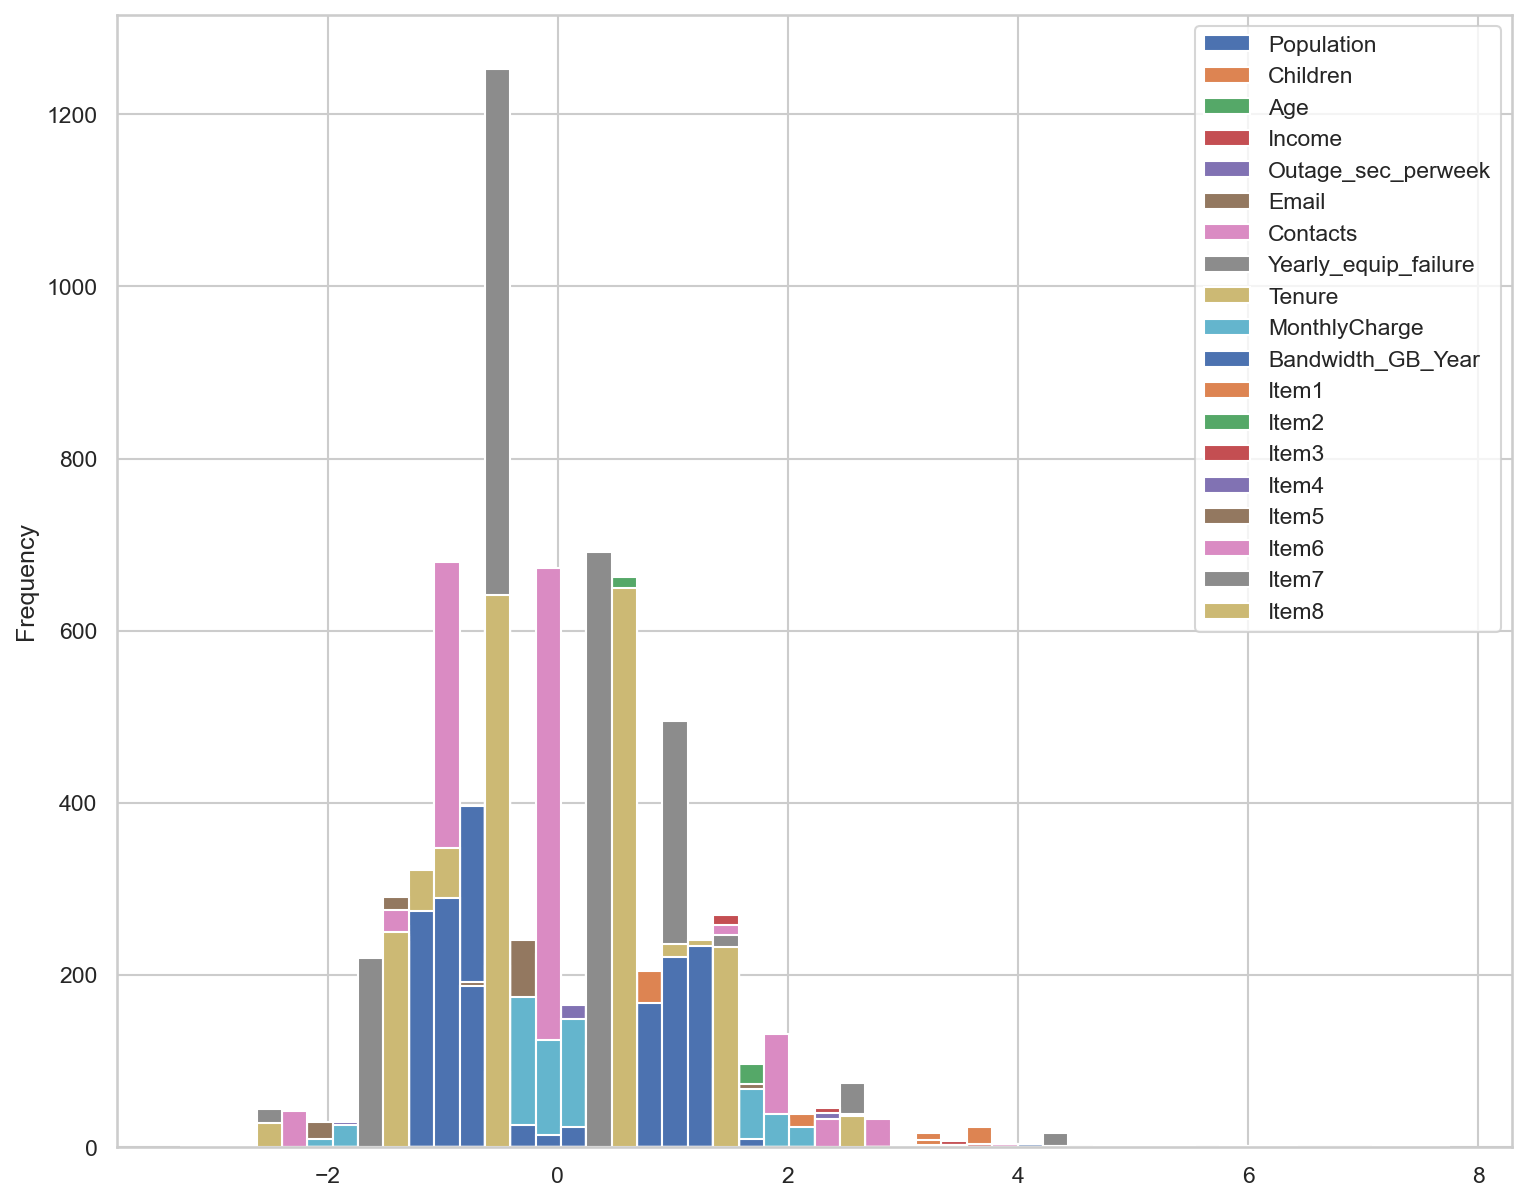

In [14]:
fig, ax = plt.subplots()

prep_df_standard.plot.hist(bins=50, ax=ax)
ax.grid(True)
plt.show()

# Part IV: Analysis
## D.  Perform PCA by doing the following:




### 1.  Determine the matrix of all the principal components.

In [92]:
# load the prepared data and reset the dataframe
df = pd.read_csv("./churn_data_prepared.csv")
num_records = df.shape[0]

print(f"{prep_df.shape[0]} records with {prep_df.shape[1]} data features loaded")

1841 records with 19 data features loaded


In [93]:
pca = PCA()
X_reduced = pca.fit_transform(df)
num_components = len(pca.components_)

# Principal Component Names
PCS = [f"PC{i + 1}" for (i, _) in enumerate(pca.components_)]

#### PCA Library

In [17]:
model = pca_pkg(normalize=True, n_components=None)
results = model.fit_transform(df)

[pca] >n_components is set to 18
[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [19] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[18]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


##### most informative features

In [18]:
results['topfeat']

,PC,feature,loading,type
0,PC1,Item1,0.47,best
1,PC2,Bandwidth_GB_Year,0.70,best
2,PC3,Item5,-0.59,best
3,PC4,Age,-0.55,best
4,PC5,Contacts,-0.53,best
5,PC6,Outage_sec_perweek,-0.58,best
6,PC7,Income,0.86,best
7,PC8,Yearly_equip_failure,0.73,best
8,PC9,MonthlyCharge,0.55,best
9,PC10,Outage_sec_perweek,-0.53,best


In [19]:
results["PC"]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.89,-0.59,1.36,2.70,0.96,-0.80,-1.18,2.53,0.37,0.73,-0.34,0.30,0.48,-2.80,-0.32,-1.26,0.24,0.02
1,2.98,-0.51,-2.25,2.06,-0.43,0.62,2.17,-1.11,0.74,1.09,-0.64,-0.42,0.01,0.46,0.92,0.20,0.38,0.79
2,0.76,-1.64,0.66,0.25,-0.42,0.28,0.91,0.08,-1.39,1.45,0.70,-0.81,-0.54,-0.58,0.42,-0.87,0.68,-0.27
3,-0.14,-1.69,0.42,0.36,0.21,-1.31,-0.46,-0.26,0.87,-0.90,-1.41,-0.07,-2.11,0.70,0.27,0.96,0.69,0.57
4,-2.19,-1.42,1.77,2.23,1.20,-0.52,0.27,-1.41,0.56,1.54,0.06,1.71,-1.10,-0.81,0.60,-1.12,0.82,-1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,-0.23,1.42,-0.01,1.32,-0.75,-0.12,-0.85,-2.13,0.02,-0.08,0.96,0.53,1.09,-0.93,0.80,0.77,1.14,-0.20
1837,-1.71,1.03,-0.92,-1.05,-1.56,-0.01,0.04,-0.10,0.07,-0.45,-1.10,-0.05,-1.22,2.09,0.44,-0.88,0.11,-0.13
1838,-0.74,1.04,1.20,-0.61,-1.46,0.60,-0.80,-0.76,0.17,-0.88,-1.89,0.08,-0.39,0.06,0.54,0.07,-0.04,0.05
1839,0.45,0.79,0.65,0.66,-1.03,0.86,0.22,-0.93,-0.70,0.24,-0.50,-0.69,0.41,-0.29,-0.79,0.24,-0.28,-0.59


##### loadings

In [20]:
results["loadings"].T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Population,0.03,-0.02,-0.00,-0.19,0.51,0.42,0.21,0.06,-0.20,-0.37,0.07,0.54,0.00,0.01,0.01,-0.01,0.03,-0.02
Children,0.03,0.03,0.00,0.55,0.03,-0.45,0.18,-0.06,0.15,0.16,0.13,0.61,-0.04,-0.13,0.07,-0.06,0.01,0.01
Age,-0.00,0.01,0.05,-0.55,-0.31,0.00,0.01,-0.05,0.04,0.32,0.64,0.25,0.07,-0.09,0.05,0.00,-0.00,-0.02
Income,-0.00,-0.01,-0.03,0.17,-0.05,0.24,0.86,0.04,0.10,0.12,0.16,-0.33,0.03,-0.04,0.06,-0.04,-0.01,-0.01
Outage_sec_perweek,-0.01,0.02,-0.02,-0.25,0.24,-0.58,0.13,0.17,0.27,-0.53,0.27,-0.23,-0.11,-0.00,0.00,0.00,-0.04,-0.02
Email,0.05,-0.00,0.11,0.17,-0.13,0.31,-0.14,-0.61,0.51,-0.38,0.18,-0.02,0.03,-0.09,-0.02,0.02,0.00,0.00
Contacts,-0.04,-0.01,0.02,-0.30,-0.53,-0.03,0.25,0.18,0.30,-0.22,-0.54,0.33,-0.03,0.02,-0.03,0.00,0.01,0.00
Yearly_equip_failure,-0.04,0.03,0.00,0.25,-0.03,0.32,-0.25,0.73,0.42,-0.01,0.23,0.01,0.11,-0.01,-0.02,0.02,-0.00,0.04
Tenure,-0.02,0.70,0.11,-0.01,-0.03,0.03,0.01,-0.00,-0.05,-0.03,0.01,-0.01,-0.02,0.02,-0.01,-0.01,-0.00,-0.00
MonthlyCharge,-0.01,0.01,0.06,-0.27,0.52,0.01,0.01,-0.10,0.55,0.50,-0.26,0.01,-0.11,0.04,-0.06,0.00,-0.07,0.03


##### PC1 vs PC2 scatterplot with loadings
Plots the Principal components with the samples, and the best performing features. Per PC, The feature with absolute highest loading is gathered. This can result into features that are seen over multiple PCs, and some features may never be detected.

The angle of the arrow describes the contribution of the variable that is seen in the particular PC. The length describes the strength of the loading.

[pca] >Plot PC1 vs PC2 with loadings.


No handles with labels found to put in legend.


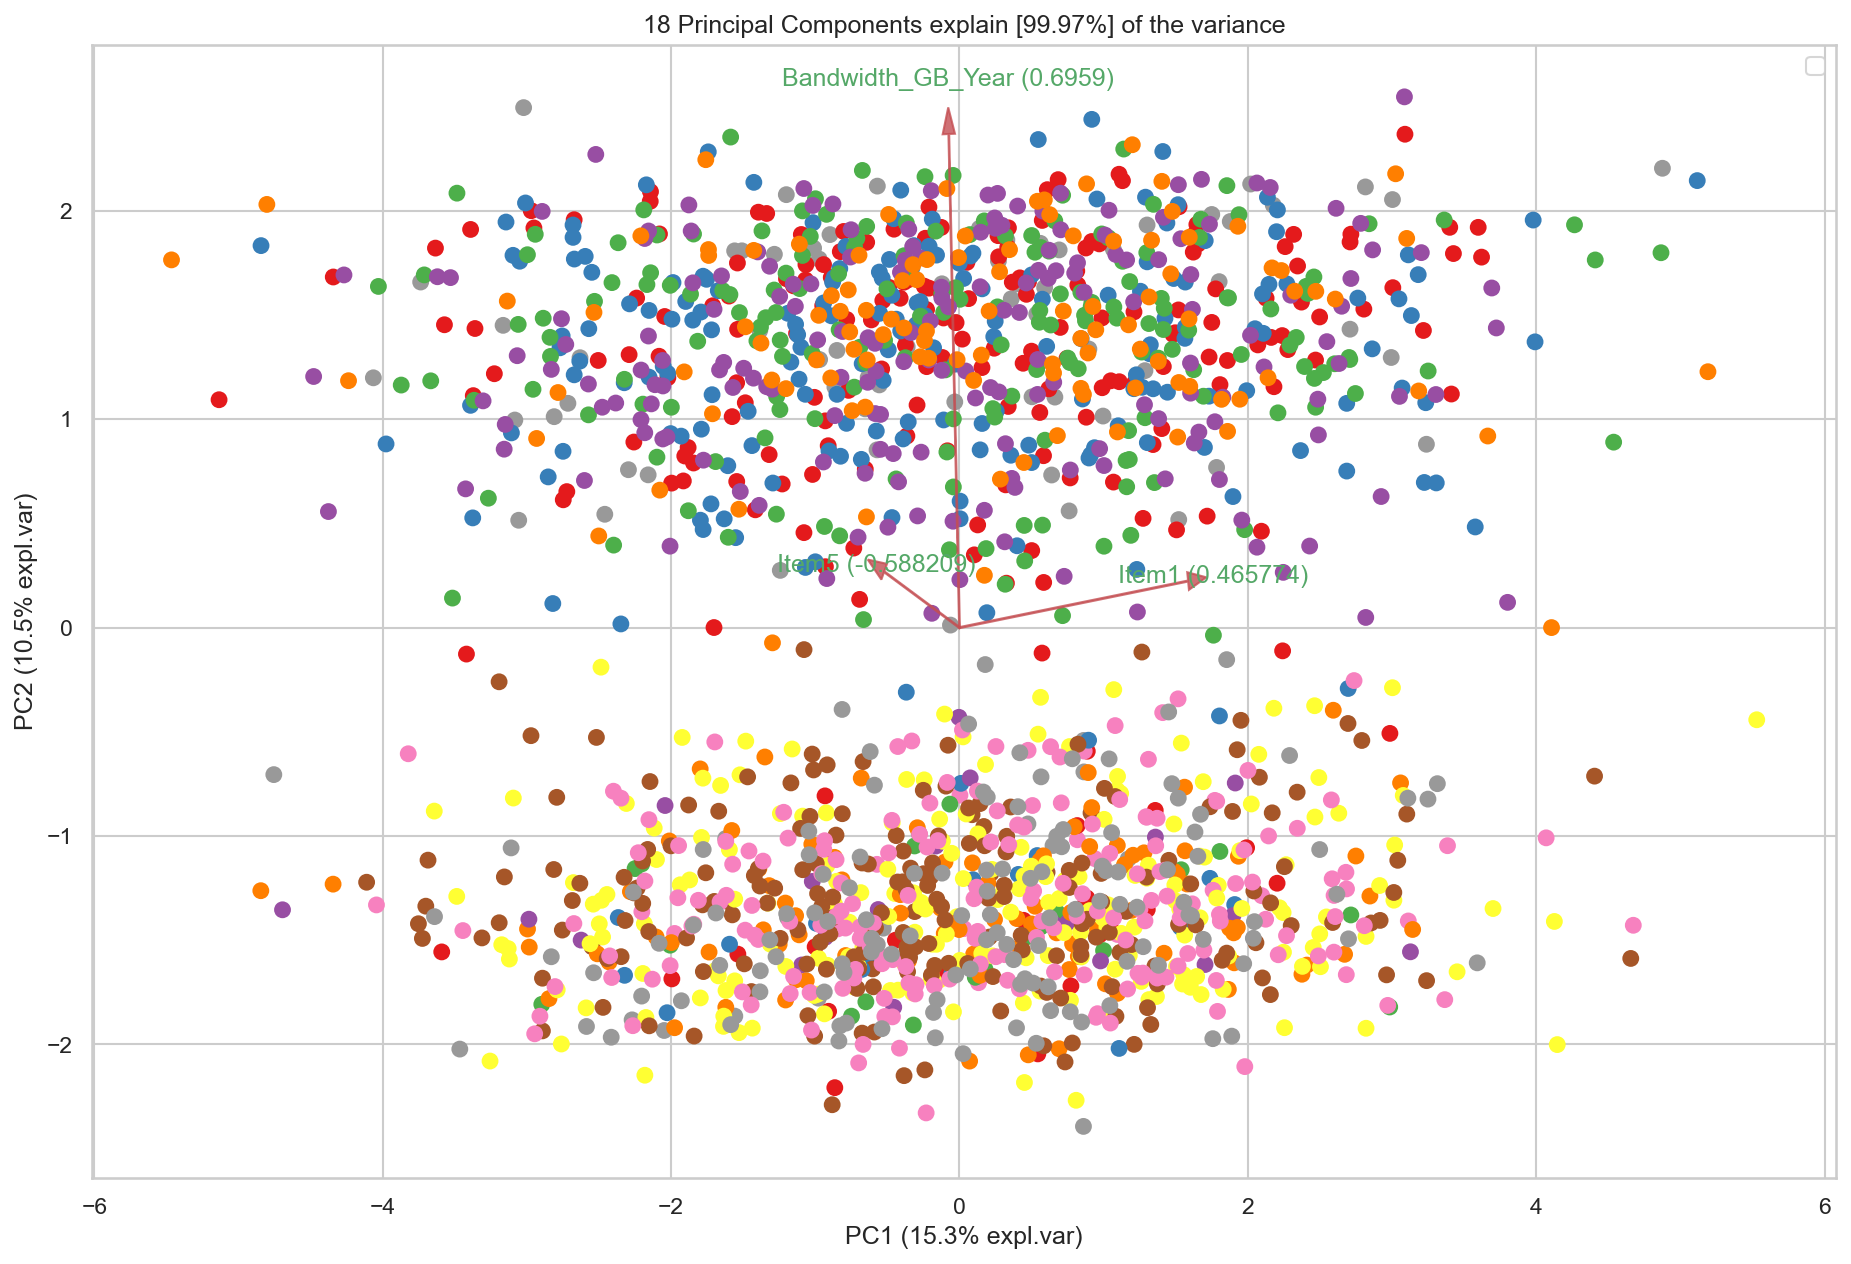

In [21]:
_ = model.biplot(label=None, gradient='#FFFFFF', n_feat=3)

##### PC1 vs PC2 scatterplot

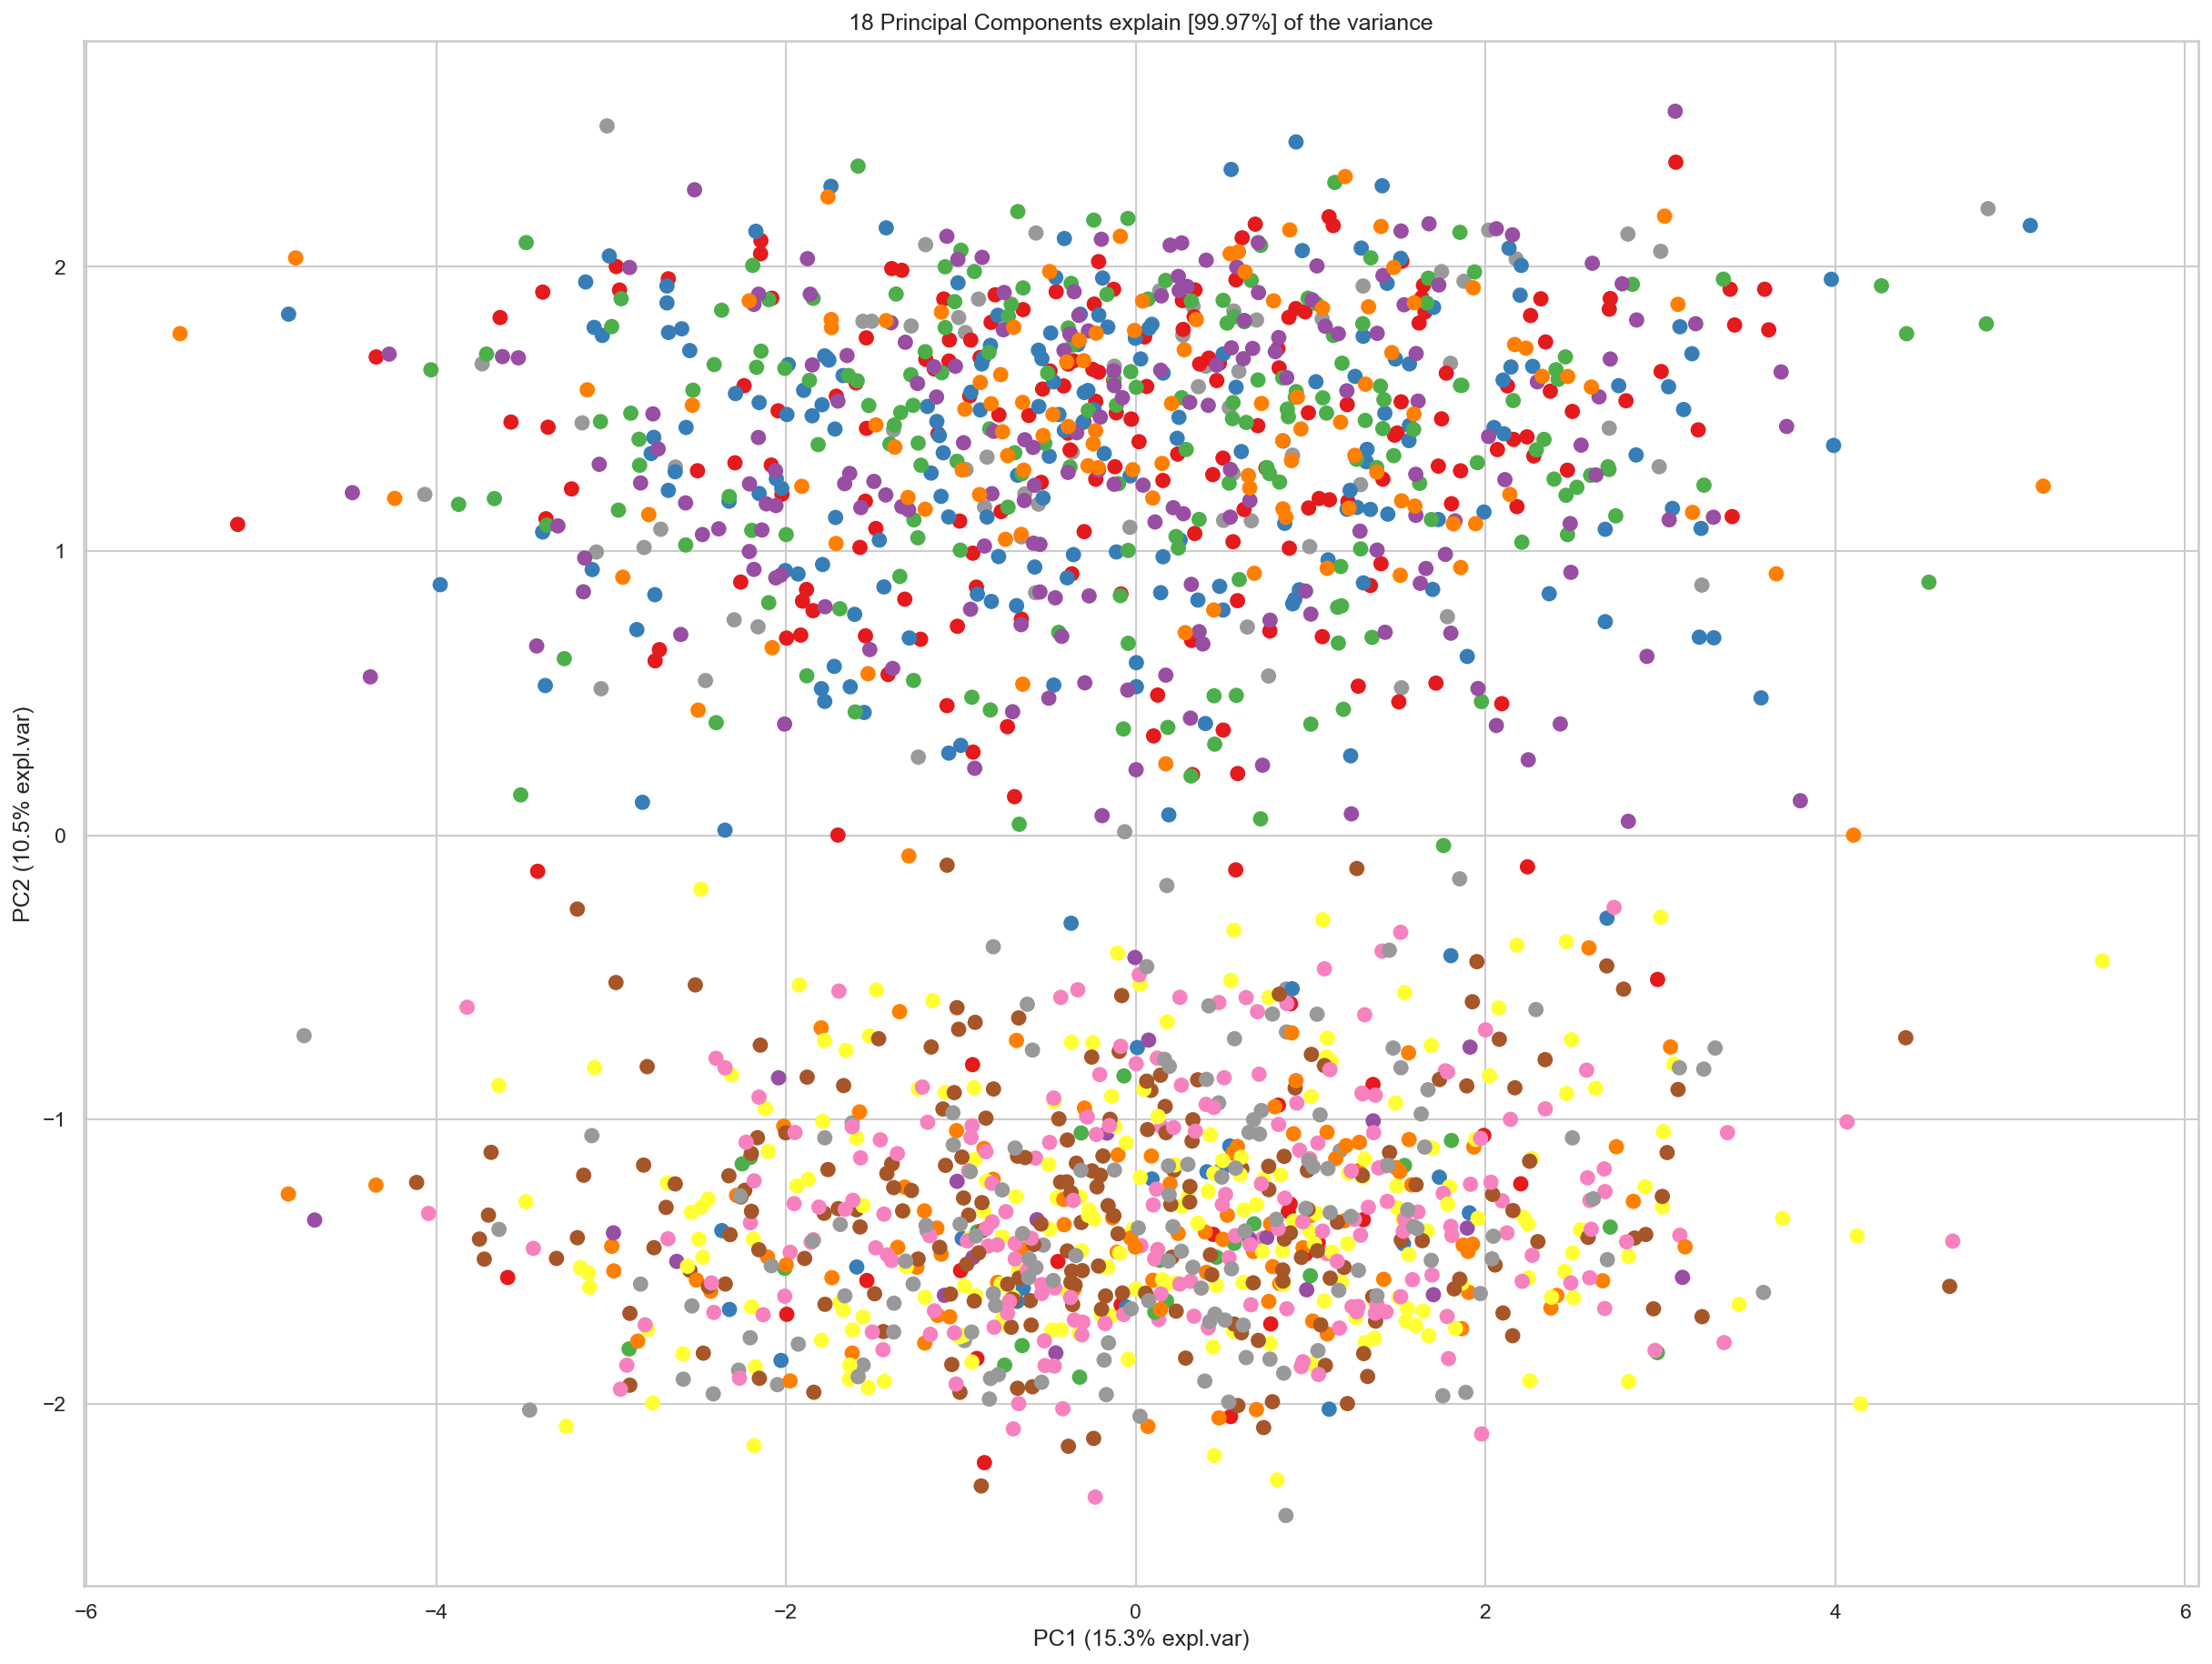

In [22]:
_ = model.scatter(label=None, legend=False, gradient='#FFFFFF', PC=[0, 1])

##### explained variance and cumulative explained variance plot
We have 19 variables in the dataset, and 19 PCs. PCA will optimize to store maximum variance in the first PC, then in the second and so on. This plot provides insights in the amount of information or explained variance in the data. We can see that the 1st PC contains almost 17% of explained variance in total. With the first 12 PCs we cover over 80% of all variance.

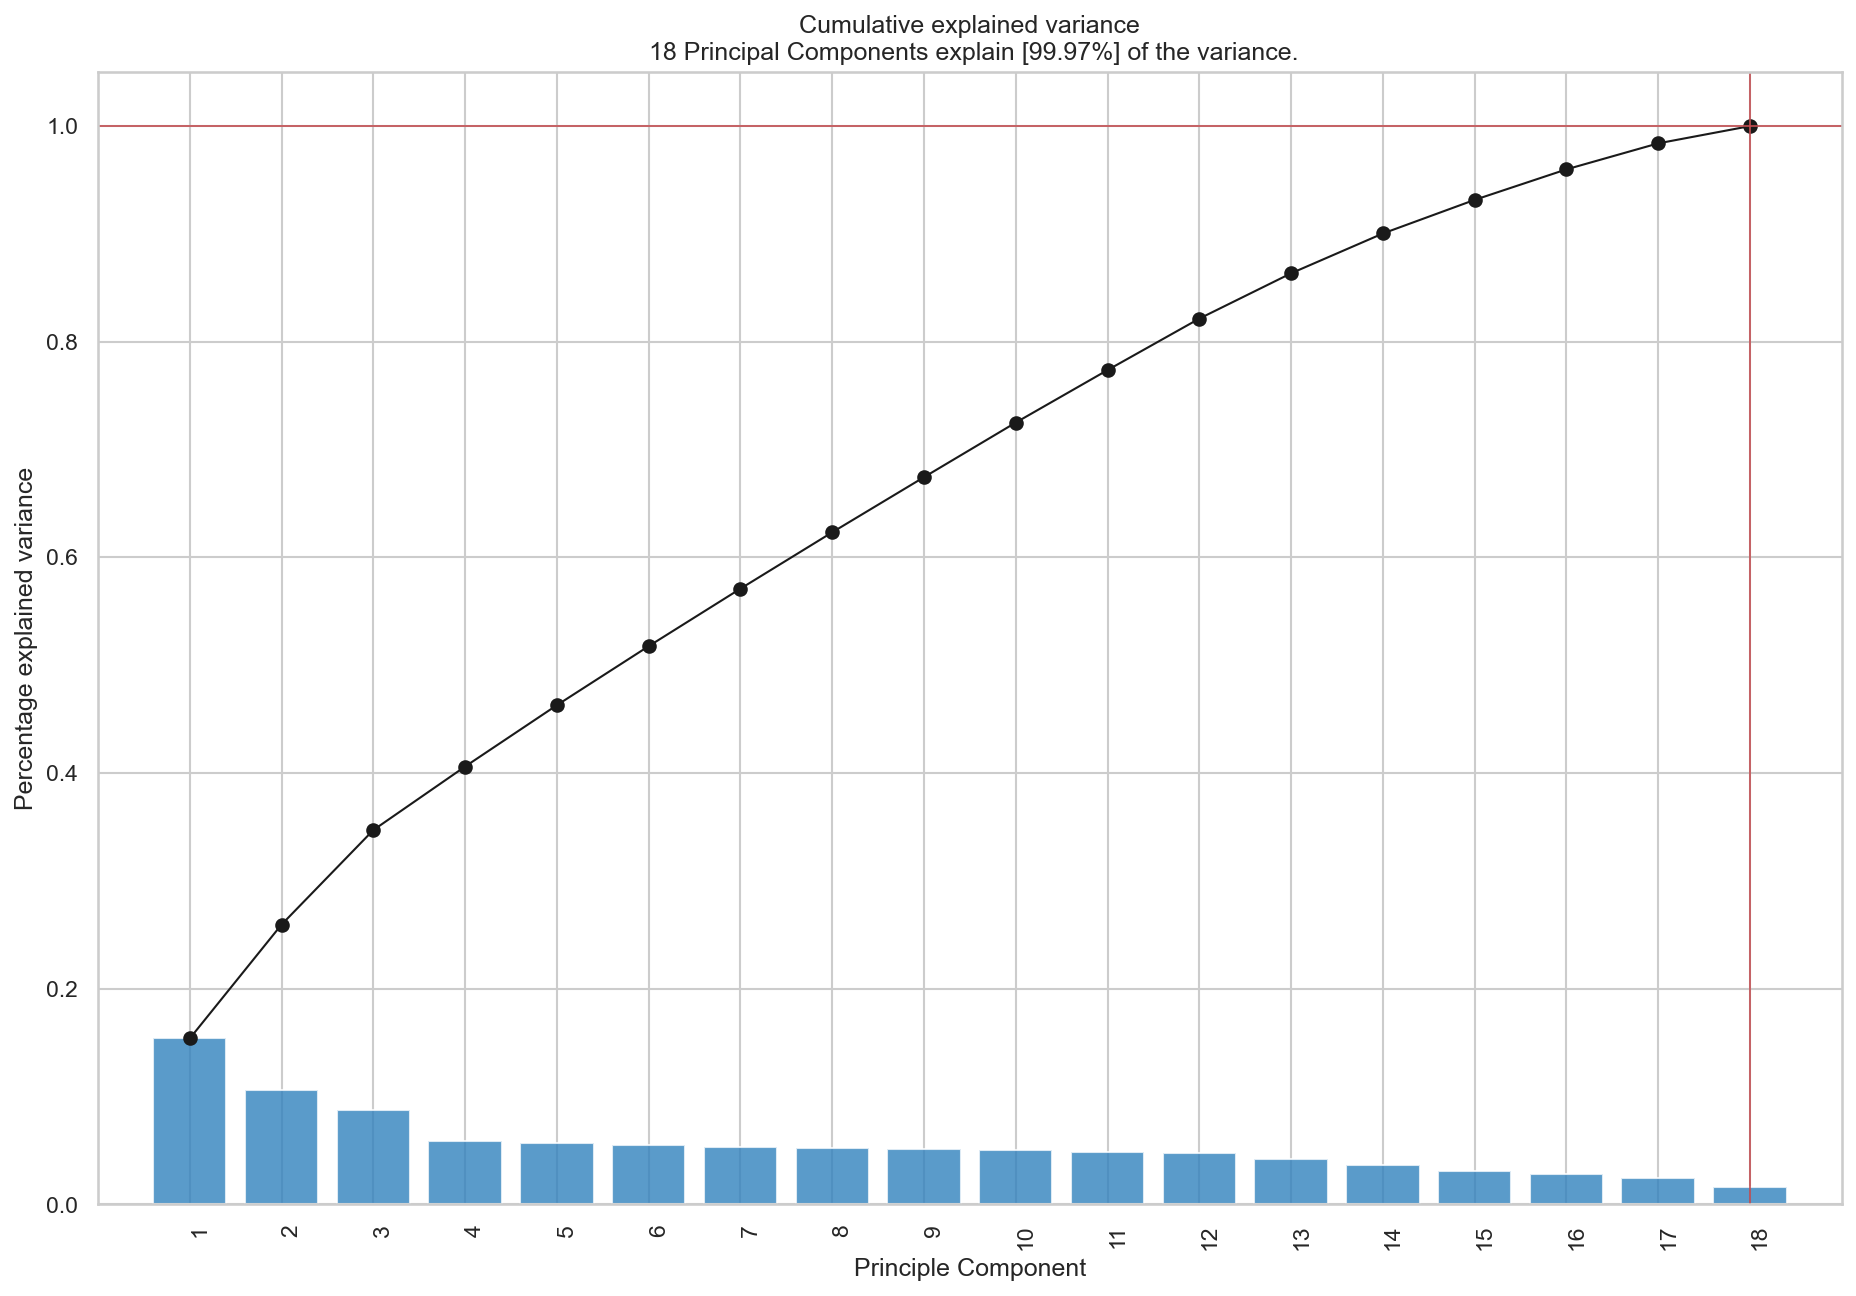

<Figure size 1800x1500 with 0 Axes>

In [23]:
_ = model.plot()


##### 3D Biplot

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


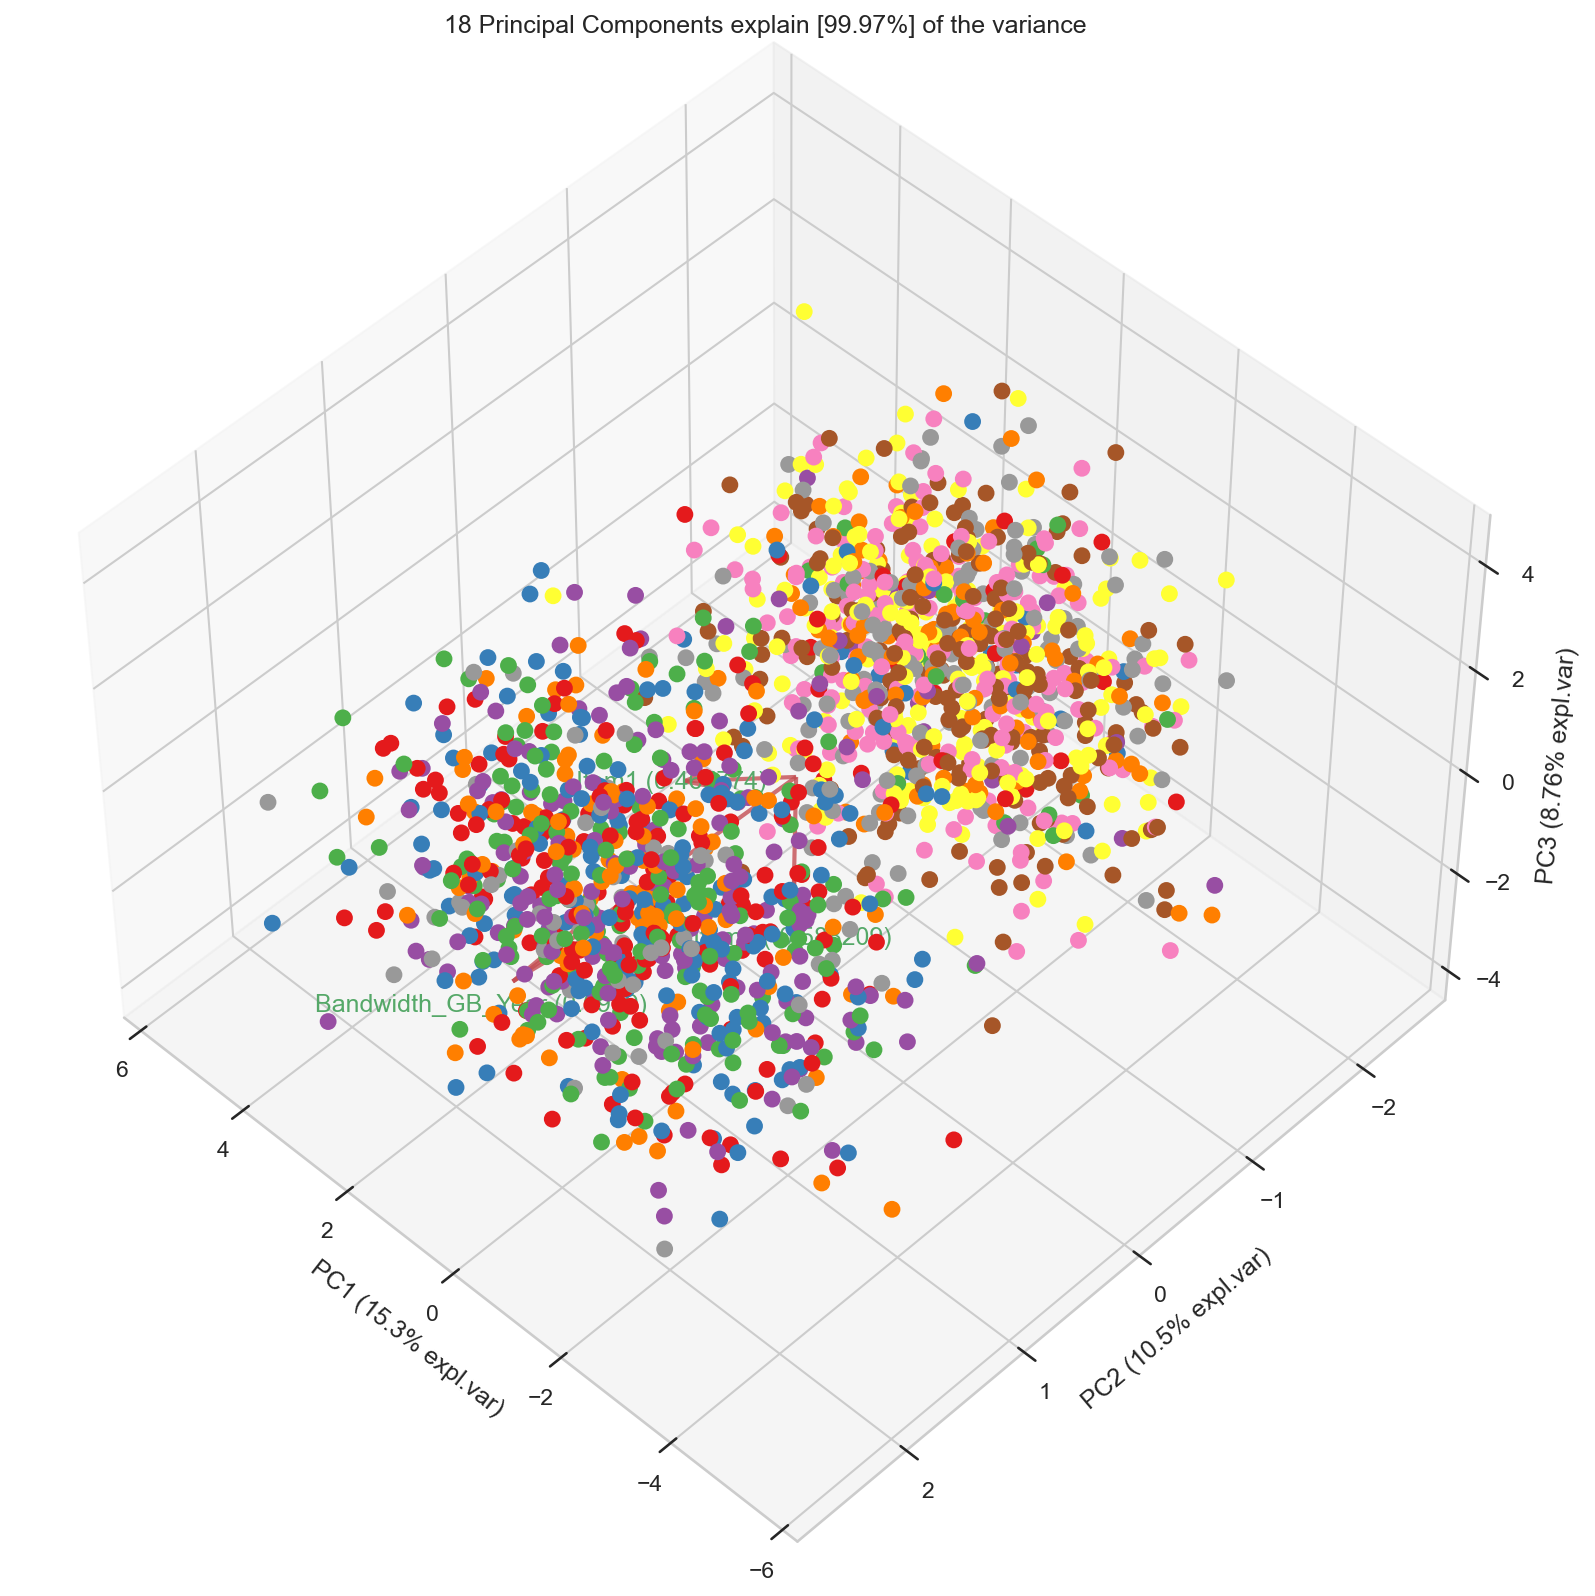

In [24]:
_ = model.biplot3d(legend=False, label=None, n_feat=3, gradient="#ffffff")

#### Loadings Table (Eigenvectors)
- proportion of each data feature within a PC
- correlation coefficients between the features and the principal components
- The components are sorted by explained_variance_.

In [94]:
loadings = pd.DataFrame(
    data=pca.components_.T,
    columns=PCS,
    index=df.columns,
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Population,0.03,-0.02,-0.00,-0.19,0.51,0.42,0.21,0.06,-0.20,-0.37,0.07,0.54,0.00,0.01,0.01,-0.01,0.03,-0.02,0.00
Children,0.03,0.03,0.00,0.55,0.03,-0.45,0.18,-0.06,0.15,0.16,0.13,0.61,-0.04,-0.13,0.07,-0.06,0.01,0.01,-0.02
Age,-0.00,0.01,0.05,-0.55,-0.31,0.00,0.01,-0.05,0.04,0.32,0.64,0.25,0.07,-0.09,0.05,0.00,-0.00,-0.02,0.02
Income,-0.00,-0.01,-0.03,0.17,-0.05,0.24,0.86,0.04,0.10,0.12,0.16,-0.33,0.03,-0.04,0.06,-0.04,-0.01,-0.01,-0.00
Outage_sec_perweek,-0.01,0.02,-0.02,-0.25,0.24,-0.58,0.13,0.17,0.27,-0.53,0.27,-0.23,-0.11,-0.00,0.00,0.00,-0.04,-0.02,-0.00
Email,0.05,-0.00,0.11,0.17,-0.13,0.31,-0.14,-0.61,0.51,-0.38,0.18,-0.02,0.03,-0.09,-0.02,0.02,0.00,0.00,-0.00
Contacts,-0.04,-0.01,0.02,-0.30,-0.53,-0.03,0.25,0.18,0.30,-0.22,-0.54,0.33,-0.03,0.02,-0.03,0.00,0.01,0.00,-0.00
Yearly_equip_failure,-0.04,0.03,0.00,0.25,-0.03,0.32,-0.25,0.73,0.42,-0.01,0.23,0.01,0.11,-0.01,-0.02,0.02,-0.00,0.04,0.00
Tenure,-0.02,0.70,0.11,-0.01,-0.03,0.03,0.01,-0.00,-0.05,-0.03,0.01,-0.01,-0.02,0.02,-0.01,-0.01,-0.00,-0.00,-0.71
MonthlyCharge,-0.01,0.01,0.06,-0.27,0.52,0.01,0.01,-0.10,0.55,0.50,-0.26,0.01,-0.11,0.04,-0.06,0.00,-0.07,0.03,-0.05


#### Loadings Table (Unit-Scaled)
- proportion of each data feature within a PC
- loadings are the covariances/correlations between the original variables and the unit-scaled components

In [26]:
pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=PCS,
    index=df.columns,
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Population,0.04,-0.03,-0.00,-0.20,0.53,0.42,0.21,0.06,-0.20,-0.37,0.06,0.51,0.00,0.01,0.00,-0.01,0.02,-0.01,0.00
Children,0.05,0.05,0.00,0.58,0.03,-0.46,0.18,-0.06,0.15,0.16,0.13,0.58,-0.04,-0.11,0.06,-0.05,0.01,0.00,-0.00
Age,-0.00,0.02,0.07,-0.59,-0.32,0.00,0.01,-0.05,0.04,0.31,0.61,0.24,0.06,-0.08,0.04,0.00,-0.00,-0.01,0.00
Income,-0.00,-0.01,-0.04,0.18,-0.05,0.25,0.87,0.04,0.09,0.12,0.15,-0.31,0.03,-0.04,0.05,-0.03,-0.01,-0.01,-0.00
Outage_sec_perweek,-0.02,0.02,-0.02,-0.26,0.25,-0.60,0.13,0.17,0.26,-0.52,0.26,-0.22,-0.10,-0.00,0.00,0.00,-0.02,-0.01,-0.00
Email,0.08,-0.00,0.14,0.18,-0.14,0.32,-0.15,-0.61,0.51,-0.37,0.17,-0.02,0.02,-0.07,-0.02,0.01,0.00,0.00,-0.00
Contacts,-0.06,-0.02,0.02,-0.32,-0.55,-0.03,0.25,0.18,0.30,-0.21,-0.52,0.31,-0.03,0.02,-0.02,0.00,0.00,0.00,-0.00
Yearly_equip_failure,-0.07,0.04,0.00,0.26,-0.03,0.33,-0.26,0.72,0.41,-0.01,0.22,0.01,0.10,-0.01,-0.02,0.01,-0.00,0.02,0.00
Tenure,-0.04,0.99,0.14,-0.02,-0.03,0.03,0.01,-0.00,-0.05,-0.03,0.01,-0.01,-0.02,0.02,-0.01,-0.01,-0.00,-0.00,-0.05
MonthlyCharge,-0.02,0.02,0.07,-0.29,0.54,0.01,0.01,-0.10,0.54,0.49,-0.25,0.01,-0.10,0.03,-0.05,0.00,-0.05,0.02,-0.00


#### Covariance Matrix
- Covariance indicates how much two random variables vary together
- The covariance matrix is a square matrix giving the covariance between each pair of elements of a given vector.
- The covariance matrix is symmetric and positive semi-definite and its main diagonal contains variances (i.e., the covariance of each element with itself).

In [102]:
cov_matrix = np.dot(
    df.T, df / num_records
)

# computed the covariance matrix of the dataset. 
cov_matrix = np.cov(m=df.T) # simplified calculation

display(pd.DataFrame(cov_matrix, columns=df.columns, index=df.columns))

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
Population,1.00,-0.05,-0.01,0.02,0.01,-0.00,-0.03,-0.00,-0.02,0.04,-0.02,0.01,0.02,0.03,0.01,-0.01,0.02,0.01,0.02
Children,-0.05,1.00,-0.06,0.02,0.01,0.00,-0.03,0.01,0.01,-0.02,0.04,0.02,0.01,0.02,-0.03,-0.03,0.01,0.05,0.04
Age,-0.01,-0.06,1.00,-0.02,0.01,-0.01,0.06,-0.03,0.03,0.02,-0.00,-0.02,-0.00,-0.01,0.01,-0.02,0.00,0.03,0.00
Income,0.02,0.02,-0.02,1.00,-0.02,0.00,0.02,0.00,-0.01,-0.01,-0.01,-0.01,0.00,0.01,-0.03,-0.01,-0.02,0.02,-0.00
Outage_sec_perweek,0.01,0.01,0.01,-0.02,1.00,-0.03,0.01,-0.02,0.01,0.03,0.01,-0.01,0.01,-0.02,-0.01,0.01,-0.02,-0.02,0.02
Email,-0.00,0.00,-0.01,0.00,-0.03,1.00,-0.00,-0.00,0.00,-0.01,0.01,0.02,0.01,0.00,0.04,-0.05,0.07,0.06,0.03
Contacts,-0.03,-0.03,0.06,0.02,0.01,-0.00,1.00,-0.00,-0.01,-0.02,-0.01,-0.03,-0.03,-0.03,0.00,0.00,-0.02,-0.03,-0.02
Yearly_equip_failure,-0.00,0.01,-0.03,0.00,-0.02,-0.00,-0.00,1.00,0.03,-0.01,0.02,-0.01,-0.04,-0.04,-0.01,0.01,-0.02,-0.02,-0.05
Tenure,-0.02,0.01,0.03,-0.01,0.01,0.00,-0.01,0.03,1.00,-0.02,0.99,0.01,0.01,0.01,-0.02,0.02,-0.02,-0.05,0.00
MonthlyCharge,0.04,-0.02,0.02,-0.01,0.03,-0.01,-0.02,-0.01,-0.02,1.00,0.05,0.00,-0.01,-0.05,0.02,-0.02,-0.00,-0.04,0.01


#### Explained Variances

In [28]:
pd.DataFrame(
    data={"Explained Variance": pca.explained_variance_.T,  
          "Explained Variance Ratio": pca.explained_variance_ratio_.T,
          "Cumulative Explained Variance Ratio": pca.explained_variance_ratio_.cumsum(),
         },
    index=PCS,
)

,Explained Variance,Explained Variance Ratio,Cumulative Explained Variance Ratio
PC1,2.92,0.15,0.15
PC2,2.01,0.11,0.26
PC3,1.67,0.09,0.35
PC4,1.12,0.06,0.41
PC5,1.08,0.06,0.46
PC6,1.04,0.05,0.52
PC7,1.01,0.05,0.57
PC8,0.99,0.05,0.62
PC9,0.97,0.05,0.67
PC10,0.96,0.05,0.72


### 2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.
- Method 2: Calculate the proportion of variance explained (briefly explained below) for each feature, pick a threshold, and add features until you hit that threshold. (For example, if you want to explain 80% of the total variability possibly explained by your model, add features with the largest explained proportion of variance until your proportion of variance explained hits or exceeds 80%.)
- Method 3: This is closely related to Method 2. Calculate the proportion of variance explained for each feature, sort features by proportion of variance explained and plot the cumulative proportion of variance explained as you keep more features. (This plot is called a scree plot, shown below.) One can pick how many features to include by identifying the point where adding a new feature has a significant drop in variance explained relative to the previous feature, and choosing features up until that point. (I call this the “find the elbow” method, as looking at the “bend” or “elbow” in the scree plot determines where the biggest drop in proportion of variance explained occurs.)



#### Eigenvectors
- eigenvectors represent a linear combination or "recipe" of variables for a given PC
- the linear combinations are scale the side C to a length of 1 using the Pythagorean Theorem to get C from A and B
- the loading score are scaled to a length of 1 eigenvector va

- eigenvectors are the scaled 1 unit long vector that represents the linear combination of data attributes
- the proportion of each data attribute is referred to as the Loading Scores

- each loading score represents the amount of variance captured by a given data feature

In [29]:
eigenvector_df = pd.DataFrame(pca.components_, columns=PCS, index=df.columns)
display(eigenvector_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Population,0.03,0.03,-0.00,-0.00,-0.01,0.05,-0.04,-0.04,-0.02,-0.01,-0.02,0.47,0.44,0.40,0.15,-0.15,0.39,0.36,0.29
Children,-0.02,0.03,0.01,-0.01,0.02,-0.00,-0.01,0.03,0.70,0.01,0.70,0.07,0.06,0.06,-0.08,0.08,-0.03,-0.06,0.01
Age,-0.00,0.00,0.05,-0.03,-0.02,0.11,0.02,0.00,0.11,0.06,0.11,-0.27,-0.27,-0.27,0.54,-0.59,0.20,0.18,0.16
Income,-0.19,0.55,-0.55,0.17,-0.25,0.17,-0.30,0.25,-0.01,-0.27,0.00,-0.02,-0.06,-0.01,-0.04,-0.03,-0.00,0.06,-0.03
Outage_sec_perweek,0.51,0.03,-0.31,-0.05,0.24,-0.13,-0.53,-0.03,-0.03,0.52,0.02,0.00,0.01,-0.02,0.03,-0.01,-0.02,-0.09,0.07
Email,0.42,-0.45,0.00,0.24,-0.58,0.31,-0.03,0.32,0.03,0.01,0.01,0.02,0.00,0.03,0.01,0.03,0.03,0.01,-0.14
Contacts,0.21,0.18,0.01,0.86,0.13,-0.14,0.25,-0.25,0.01,0.01,0.02,-0.04,-0.01,0.01,-0.03,-0.05,-0.04,0.05,0.05
Yearly_equip_failure,0.06,-0.06,-0.05,0.04,0.17,-0.61,0.18,0.73,-0.00,-0.10,-0.01,0.03,0.01,0.03,0.09,-0.06,0.03,0.02,-0.03
Tenure,-0.20,0.15,0.04,0.10,0.27,0.51,0.30,0.42,-0.05,0.55,-0.01,0.06,0.03,-0.05,-0.08,0.05,0.02,-0.02,0.02
MonthlyCharge,-0.37,0.16,0.32,0.12,-0.53,-0.38,-0.22,-0.01,-0.03,0.50,-0.00,0.03,0.01,-0.01,-0.02,-0.02,-0.01,0.02,-0.01


#### Eigenvalues
- Eigenvalues represents the sum of squared distances for a best fit line on a given PC
- Eigenvalues represent the sum of squared distances between the projected data points and the origin for a best fit line on a given PC
- The square root of the eigenvalue is referred to as the Singular Value
- An eigenvalue represents the proportion of variation that each PC accounts for
- The amount of variance explained by each of the selected components

In [30]:
# Multiple ways to access eigenvalues

# Eigenvalues represents the sum of the squared distances for the best fit line on a given PC

# Compute the eigenvalues and right eigenvectors of a square array.
# The eigenvalues are not necessarily ordered. 
# Eigenvalues are the variance explained by each principal component and are constrained to decrease monotonically from the first principal component to the last
eigenvalues = [
    np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector))
    for eigenvector in pca.components_
]

print(f"Method #1\n {np.round(eigenvalues, 2)}\n")

# The amount of variance explained by each of the selected components
# The variance estimation uses `n_samples - 1` degrees of freedom.
eigenvalues = pca.explained_variance_

print(f"Method #2\n {np.round(eigenvalues, 2)}\n")    

# Compute the eigenvalues and right eigenvectors of a square array.
# The eigenvalues are not necessarily ordered.
# eigendecomposition of covariance matrix
# eigendecomposition: yielding a list of eigenvalues and the corresponding eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues = np.array(sorted(np.linalg.eigvals(cov_matrix), reverse=True))

print(f"Method #3\n {np.round(eigenvalues, 2)}\n")

print(eigenvalues / pca.explained_variance_.sum())

pca.explained_variance_ratio_


Method #1
 [2.92 2.01 1.67 1.12 1.08 1.04 1.01 0.99 0.97 0.96 0.93 0.91 0.8  0.7
 0.59 0.54 0.46 0.3  0.01]

Method #2
 [2.92 2.01 1.67 1.12 1.08 1.04 1.01 0.99 0.97 0.96 0.93 0.91 0.8  0.7
 0.59 0.54 0.46 0.3  0.01]

Method #3
 [2.92 2.01 1.67 1.12 1.08 1.04 1.01 0.99 0.97 0.96 0.93 0.91 0.8  0.7
 0.59 0.54 0.46 0.3  0.01]

[0.15381301 0.10559046 0.08762985 0.05890812 0.05688391 0.05470366
 0.05331168 0.05226878 0.05111583 0.05062377 0.0486664  0.04772633
 0.04200152 0.03691048 0.03116628 0.02828912 0.02411642 0.01599016
 0.00028422]


array([0.15381301, 0.10559046, 0.08762985, 0.05890812, 0.05688391,
       0.05470366, 0.05331168, 0.05226878, 0.05111583, 0.05062377,
       0.0486664 , 0.04772633, 0.04200152, 0.03691048, 0.03116628,
       0.02828912, 0.02411642, 0.01599016, 0.00028422])

In [31]:
pd.DataFrame(eigenvalues, index=PCS).T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,2.92,2.01,1.67,1.12,1.08,1.04,1.01,0.99,0.97,0.96,0.93,0.91,0.80,0.70,0.59,0.54,0.46,0.30,0.01


#### Eigenpairs

In [32]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i].round(3)) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

pd.DataFrame(eigen_pairs, columns=['Eigenvalue', 'Eigenvector'])

,Eigenvalue,Eigenvector
0,2.92,"[-0.026, -0.029, 0.002, 0.001, 0.012, -0.046, 0.035, 0.039, 0.022, 0.014, 0.022, -0.466, -0.443, -0.403, -0.147, 0.153, -0.393, -0.363, -0.292]"
1,2.01,"[-0.024, 0.034, 0.011, -0.009, 0.017, -0.003, -0.012, 0.031, 0.696, 0.014, 0.696, 0.066, 0.064, 0.061, -0.077, 0.079, -0.028, -0.055, 0.007]"
2,1.67,"[0.0, -0.022, 0.022, -0.002, -0.001, -0.001, -0.002, 0.001, -0.706, -0.046, 0.706, 0.0, 0.0, 0.002, -0.004, 0.001, 0.001, 0.003, -0.005]"
3,1.12,"[-0.002, 0.002, 0.051, -0.027, -0.018, 0.108, 0.019, 0.003, 0.107, 0.055, 0.114, -0.27, -0.273, -0.273, 0.542, -0.588, 0.197, 0.178, 0.157]"
4,1.08,"[-0.022, 0.007, -0.015, -0.012, -0.019, 0.005, 0.003, 0.036, -0.001, 0.028, 0.0, -0.794, 0.555, 0.213, -0.036, 0.021, 0.097, -0.008, 0.044]"
5,1.04,"[-0.028, -0.009, 0.001, 0.008, 0.036, -0.003, -0.007, 0.003, 0.004, 0.067, 0.006, -0.215, -0.617, 0.657, 0.029, 0.236, 0.267, 0.07, 0.042]"
6,1.01,"[-0.01, -0.061, 0.001, -0.043, 0.001, 0.016, 0.003, 0.016, -0.009, 0.0, -0.013, 0.023, -0.072, 0.311, -0.537, -0.729, -0.159, -0.213, 0.013]"
7,0.99,"[-0.006, -0.074, -0.053, -0.06, -0.002, 0.024, 0.028, 0.025, 0.008, 0.062, 0.011, -0.063, -0.03, 0.163, 0.068, 0.018, -0.743, 0.61, 0.15]"
8,0.97,"[0.011, -0.13, -0.093, -0.044, -0.0, -0.089, 0.021, -0.011, 0.025, 0.036, 0.023, -0.122, -0.137, -0.383, -0.591, 0.063, 0.363, 0.522, 0.155]"
9,0.96,"[0.191, -0.548, 0.553, -0.166, 0.249, -0.172, 0.3, -0.25, 0.015, 0.272, -0.0, 0.02, 0.058, 0.014, 0.04, 0.035, 0.005, -0.062, 0.026]"


#### Scree Plot & Kaiser Rule
- Scree Plot repreprents the percentages of variation that each PC accounts for

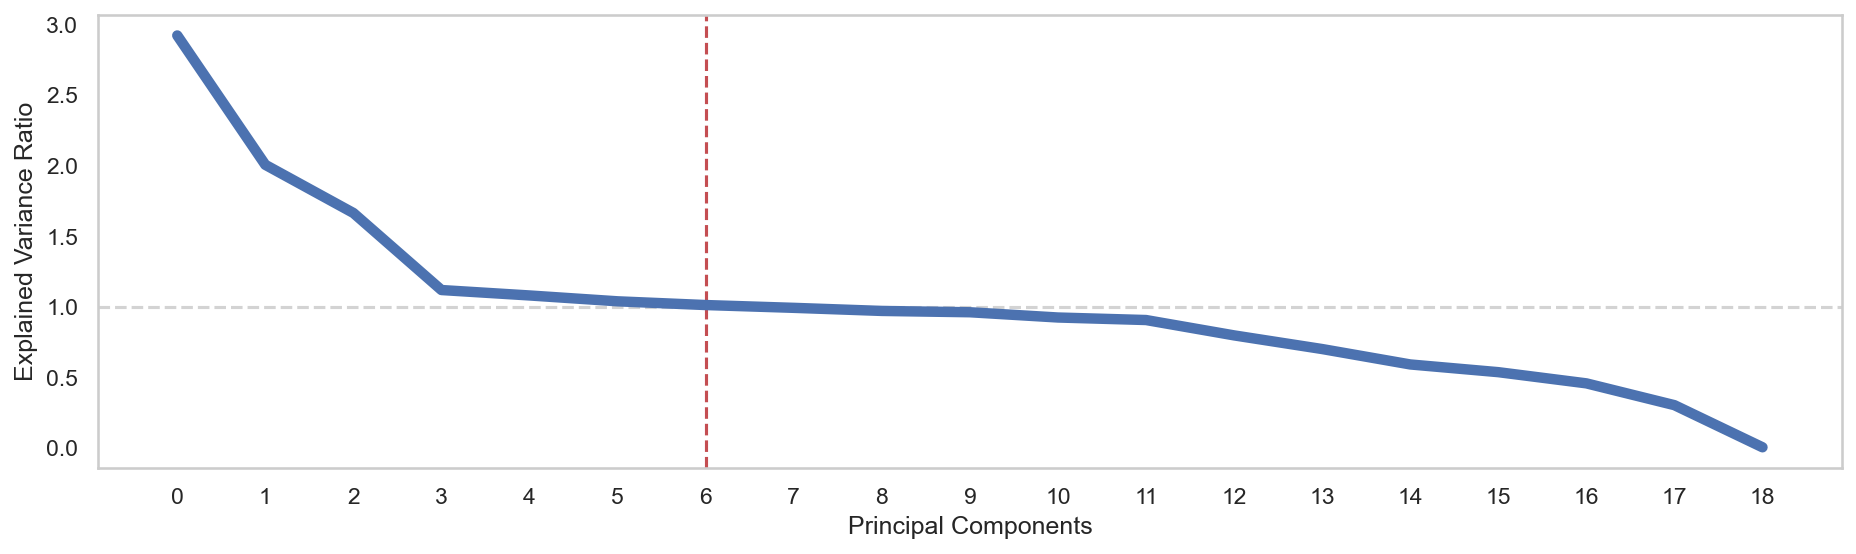

Based on the Kaiser Rule, we'll keep the first 7 PCs


In [100]:
plt.figure(figsize=(15, 4))

min_explained_var = 1
num_pcs_to_use_kaiser = len(eigenvalues[eigenvalues >= min_explained_var])

plt.axvline(num_pcs_to_use_kaiser - 1, linestyle="--", color="r", linewidth=1.5) # number of PCs to use
plt.axhline(y=1, color="lightgray", linestyle="--", linewidth=1.5) # min explained var cutoff

sns.lineplot(data=eigenvalues, linewidth=5, markers="x")
plt.xticks(np.arange(0, len(PCS), 1))

plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")

plt.show()

# The Kaiser rule: drop all components with eigenvalues < 1.0
print(f"Based on the Kaiser Rule, we'll keep the first {num_pcs_to_use_kaiser} PCs")


#### Important Loadings Per Principal Component

In [48]:
# mask loading scores below the top 3 absolute values
eigenvector_df.apply(lambda x: x.mask(x.abs() < x.abs().nlargest(3, "all")[-1], "-")).iloc[:,:num_pcs_to_use_kaiser]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Population,-,-,-,-,-,-,-
Children,-,-,-,-,-,-,-
Age,-,-,-,-,-,-,-
Income,-,0.55,-0.55,-,-,-,-
Outage_sec_perweek,0.51,-,-,-,-,-,-0.53
Email,0.42,-0.45,-,0.24,-0.58,-,-
Contacts,-,-,-,0.86,-,-,-
Yearly_equip_failure,-,-,-,-,-,-0.61,-
Tenure,-,-,-,-,-,0.51,-
MonthlyCharge,-,-,0.32,-,-0.53,-0.38,-


In [49]:
colname = f"Top Occurrences in {num_pcs_to_use} PCs"
pd.DataFrame(eigenvector_df.apply(lambda x: x.mask(x.abs() < x.abs().nlargest(3, "all")[-1])).iloc[:,:num_pcs_to_use_kaiser].apply(lambda s: (s > 0).sum(), axis=1), columns=[colname]).sort_values(by=colname, ascending=False)[:5]


,Top Occurrences in 7 PCs
Item1,3
Email,2
Bandwidth_GB_Year,2
MonthlyCharge,1
Income,1


#### Explained Variance Plot
- The amount of variance explained by each of the selected components.
- The variance estimation uses `n_samples - 1` degrees of freedom.


In [37]:
pca.explained_variance_

array([2.92403543, 2.00730916, 1.66587211, 1.11986258, 1.08138172,
       1.03993441, 1.0134724 , 0.99364661, 0.97172855, 0.96237434,
       0.92516405, 0.90729313, 0.79846265, 0.70168024, 0.59248112,
       0.53778539, 0.45846102, 0.30397807, 0.00540309])

Text(0, 0.5, 'Explained Variance Ratio')

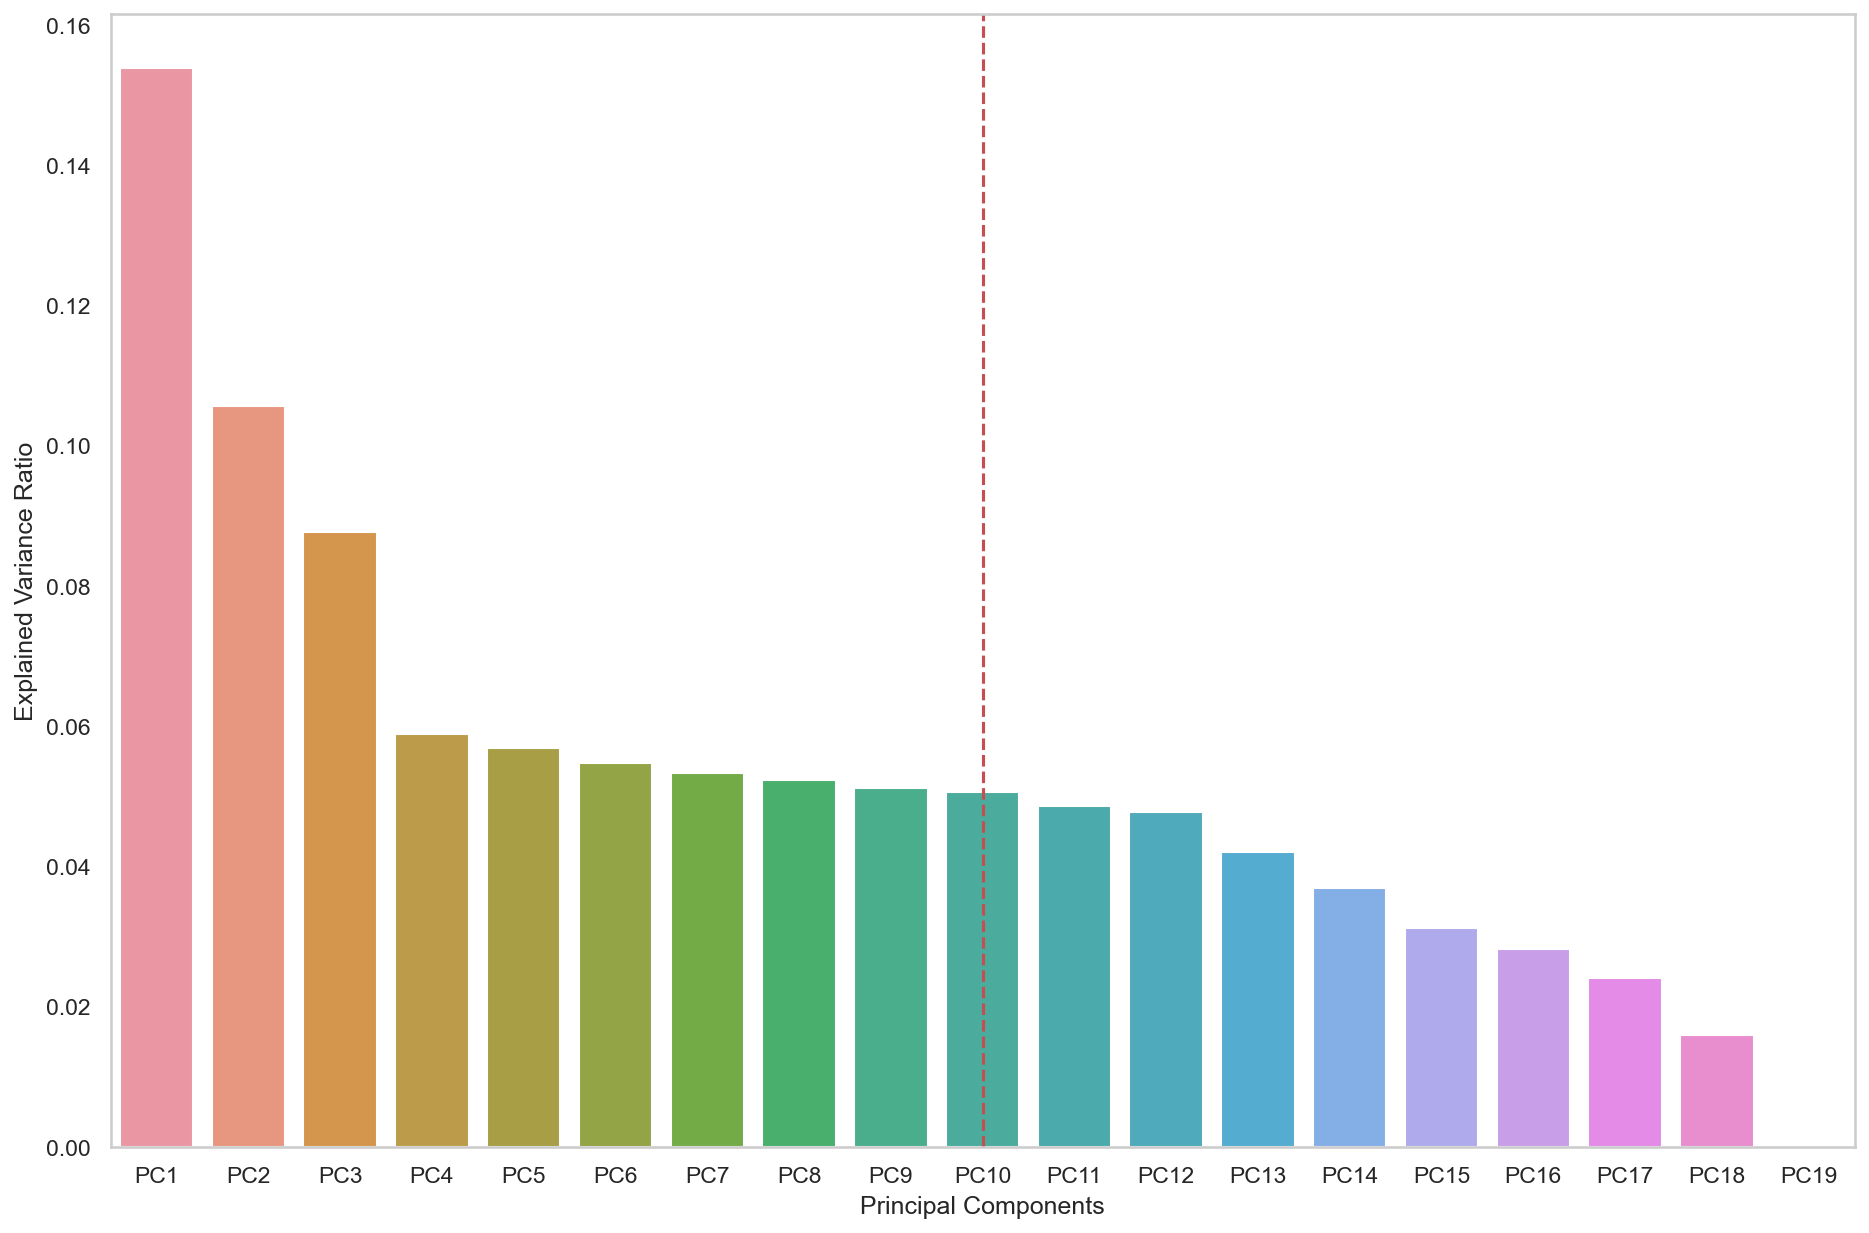

In [64]:
plt.figure(figsize=(15, 10))

min_explained_var = 0.75
num_pcs_to_use_pct = len(var_ratios[var_ratios <= min_explained_var])

plt.axvline(num_pcs_to_use_pct - 1, linestyle="--", color="r", linewidth=1.5) # number of PCs to use

sns.barplot(y=pca.explained_variance_ratio_, x=PCS)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")

#### Cumulative Explained Variance Ratio Plot

`pca.explained_variance_ratio_ = eigenvalues / pca.explained_variance_.sum()`

Based on wanting to explain 75% of the variance, we'll keep the first 10 PCs


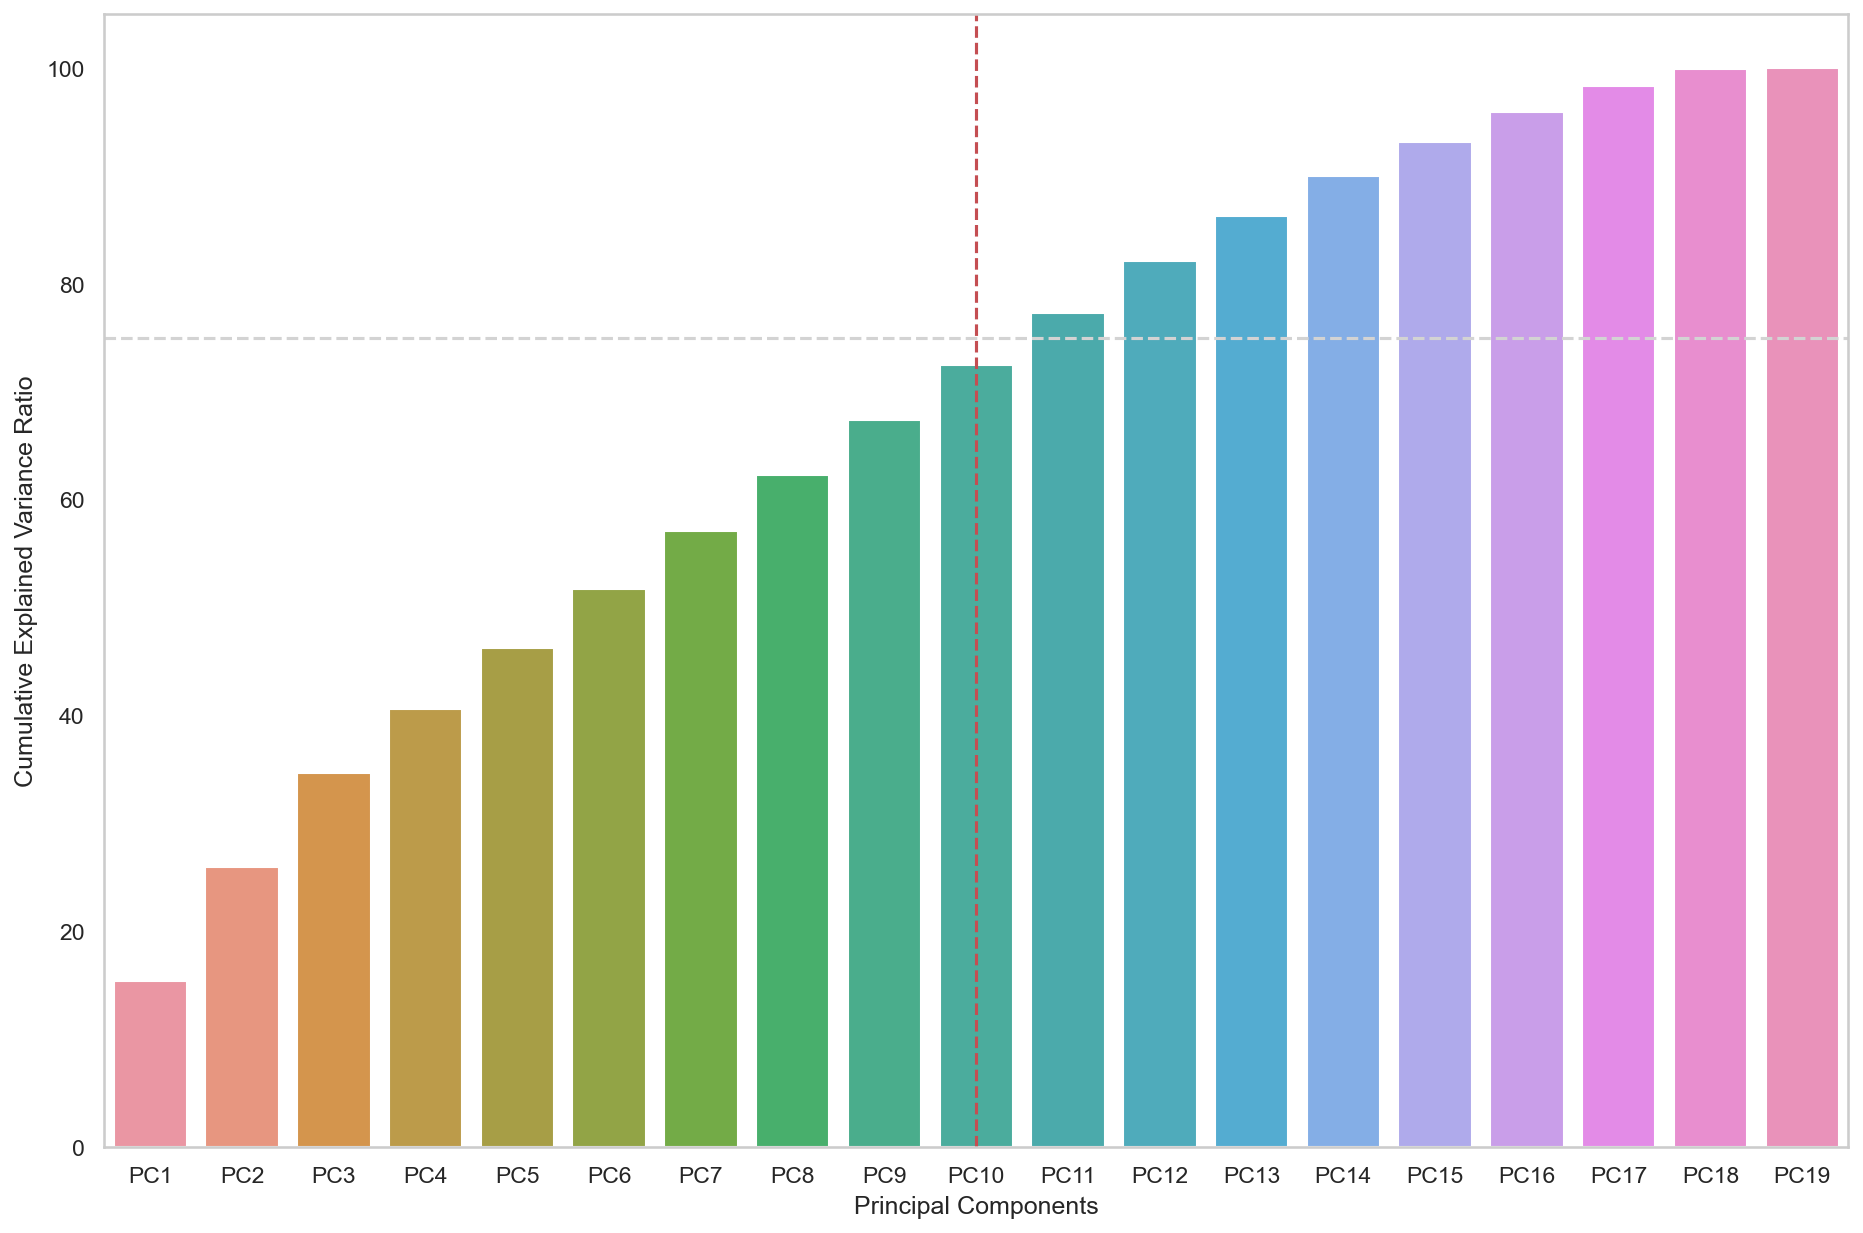

In [65]:
plt.figure(figsize=(15, 10))

var_ratios = pca.explained_variance_ratio_.cumsum()
min_explained_var = 0.75
num_pcs_to_use = len(var_ratios[var_ratios <= min_explained_var])

plt.axvline(num_pcs_to_use - 1, linestyle="--", color="r", linewidth=1.5) # number of PCs to use
plt.axhline(y=75, color="lightgray", linestyle="--", linewidth=1.5) # min explained var cutoff

sns.barplot(y=var_ratios * 100, x=PCS)
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")

print(f"Based on wanting to explain {min_explained_var:.0%} of the variance, we'll keep the first {num_pcs_to_use_pct} PCs")

### 3.  Identify the variance of each of the principal components identified in part D2.


In [52]:
# Percentage of variance explained by each of the selected components.
explained_var_df = {
    "Explained Variance": pca.explained_variance_ratio_,    
    "Cumulative Explained Variance": pca.explained_variance_ratio_.cumsum(),    
}

var_df = pd.DataFrame(explained_var_df, index=PCS).T
var_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
Explained Variance,0.15,0.11,0.09,0.06,0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.03,0.03,0.02,0.02,0.00
Cumulative Explained Variance,0.15,0.26,0.35,0.41,0.46,0.52,0.57,0.62,0.67,0.72,0.77,0.82,0.86,0.90,0.93,0.96,0.98,1.00,1.00


In [53]:
var_df.iloc[:,:num_pcs_to_use_kaiser]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Explained Variance,0.15,0.11,0.09,0.06,0.06,0.05,0.05
Cumulative Explained Variance,0.15,0.26,0.35,0.41,0.46,0.52,0.57


### 4.  Identify the total variance captured by the principal components identified in part D2.

In [101]:
var_df.iloc[:,:num_pcs_to_use_kaiser]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Explained Variance,0.15,0.11,0.09,0.06,0.06,0.05,0.05
Cumulative Explained Variance,0.15,0.26,0.35,0.41,0.46,0.52,0.57


In [54]:
pcs_explained_var = var_df.loc["Cumulative Explained Variance"][num_pcs_to_use_kaiser - 1]

f"The selected {num_pcs_to_use_kaiser} PCs capture {pcs_explained_var:.1%} of our variance"

'The selected 7 PCs capture 57.1% of our variance'

### 5.  Summarize the results of your data analysis.

The analysis results indicate that the 18 PCs could account for 99.97% of the variance throughout the data features. More importantly, based on the scree plot and Kaiser Rule, we should retain the first 7 PCs — these PCs will capture 57% of the variance. Likewise, we should retain the first 10 PCs if we wish to capture 75% of the variance. Additionally, PC1 captured 15% of our variance, whereas PC2 and PC3 captured 11% and 8% respectively.

The loadings scores also provided insight into individual feature contributions to PCs. For example, in PC1 we saw that Outage_sec_perweek, Email, and Item1 were our highest contributing features. Outage_sec_perweek contributed 0.51 to the loading, Email contributed 0.42 and Item1 contributed 0.54. PC2 indicated Income, Email, and Item1 were the highest contributors. Interestingly email had a negative contribution of -0.45, which was -1.35 times as important as Item1.

Lastly, throughout our 7 PCs, Item1, Email, and Bandwidth_GB_Year were frequently seen as top 3 contributors.

# Part V: Attachments

## E.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.
- https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
- https://www.youtube.com/watch?v=qtaqvPAeEJY
- https://youtu.be/FgakZw6K1QQ
- https://builtin.com/data-science/step-step-explanation-principal-component-analysis
- https://stats.stackexchange.com/a/32700
- https://analyticsindiamag.com/guide-to-image-reconstruction-using-principal-component-analysis/
- https://academic.oup.com/heapol/article/21/6/459/612115?login=false
- https://towardsdatascience.com/what-are-pca-loadings-and-biplots-9a7897f2e559
- https://sebastianraschka.com/Articles/2014_pca_step_by_step.html
- https://www.geeksforgeeks.org/how-to-compute-the-eigenvalues-and-right-eigenvectors-of-a-given-square-array-using-numpy/
- https://towardsdatascience.com/pca-eigenvectors-and-eigenvalues-1f968bc6777a



### F.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

Brems, M. (2022, January 26). A one-stop shop for principal component analysis. Medium. Retrieved August 28, 2022, from https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c 

Jaadi, Z. (2021, April 1). A step-by-step explanation of principal component analysis (PCA). Built In. Retrieved August 28, 2022, from https://builtin.com/data-science/step-step-explanation-principal-component-analysis 

Smith, L. I. (2002, February 26). A tutorial on Principal Components Analysis. Technical Report OUCS-2002-12. Retrieved August 28, 2022, from https://ourarchive.otago.ac.nz/bitstream/handle/10523/7534/OUCS-2002-12.pdf?sequence=1&amp;source=post_page--------------------------- 

Taskesen, E. (2022, April 19). What are PCA loadings and biplots? Medium. Retrieved August 28, 2022, from https://towardsdatascience.com/what-are-pca-loadings-and-biplots-9a7897f2e559 